##### Part A: Basic EDA (Exploratory Data Analysis)


In [367]:
#Libraries
import pandas as pd
from colorama import Fore
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans


In [368]:
#Load the dataset into a Pandas DataFrame and display the first 5 rows.
hr=pd.read_csv(r"C:\Users\ADEN\Desktop\DATA SCIENCE\Files\HRDataset_v14.csv")
hr.index=range(1,len(hr)+1)
hr.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
1,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
2,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
3,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
4,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
5,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


##### Data Sanity Checks

In [369]:
#Checking the number of rows and columns(the shape)
print(f"The dataset has {hr.shape[0]} number of rows and {hr.shape[1]} number of columns")

The dataset has 311 number of rows and 36 number of columns


In [370]:
hr.describe().T

,count,mean,std,min,25%,50%,75%,max
EmpID,311.0,10156.000000,89.922189,10001.00,10078.50,10156.00,10233.5,10311.0
MarriedID,311.0,0.398714,0.490423,0.00,0.00,0.00,1.0,1.0
MaritalStatusID,311.0,0.810289,0.943239,0.00,0.00,1.00,1.0,4.0
GenderID,311.0,0.434084,0.496435,0.00,0.00,0.00,1.0,1.0
EmpStatusID,311.0,2.392283,1.794383,1.00,1.00,1.00,5.0,5.0
DeptID,311.0,4.610932,1.083487,1.00,5.00,5.00,5.0,6.0
PerfScoreID,311.0,2.977492,0.587072,1.00,3.00,3.00,3.0,4.0
FromDiversityJobFairID,311.0,0.093248,0.291248,0.00,0.00,0.00,0.0,1.0
Salary,311.0,69020.684887,25156.636930,45046.00,55501.50,62810.00,72036.0,250000.0
Termd,311.0,0.334405,0.472542,0.00,0.00,0.00,1.0,1.0


In [371]:
#Display the column names and their data types.
print(hr.dtypes)

Employee_Name                  object
EmpID                           int64
MarriedID                       int64
MaritalStatusID                 int64
GenderID                        int64
EmpStatusID                     int64
DeptID                          int64
PerfScoreID                     int64
FromDiversityJobFairID          int64
Salary                          int64
Termd                           int64
PositionID                      int64
Position                       object
State                          object
Zip                             int64
DOB                            object
Sex                            object
MaritalDesc                    object
CitizenDesc                    object
HispanicLatino                 object
RaceDesc                       object
DateofHire                     object
DateofTermination              object
TermReason                     object
EmploymentStatus               object
Department                     object
ManagerName 

In [372]:
#Find the number of unique values in each column.
unique_values=hr.nunique()

print(unique_values)

Employee_Name                 311
EmpID                         311
MarriedID                       2
MaritalStatusID                 5
GenderID                        2
EmpStatusID                     5
DeptID                          6
PerfScoreID                     4
FromDiversityJobFairID          2
Salary                        308
Termd                           2
PositionID                     30
Position                       32
State                          28
Zip                           158
DOB                           307
Sex                             2
MaritalDesc                     5
CitizenDesc                     3
HispanicLatino                  4
RaceDesc                        6
DateofHire                    101
DateofTermination              96
TermReason                     18
EmploymentStatus                3
Department                      6
ManagerName                    21
ManagerID                      23
RecruitmentSource               9
PerformanceSco

In [373]:
#Identify missing values in the dataset and list columns with nulls.
print(hr.isnull().sum())

Employee_Name                   0
EmpID                           0
MarriedID                       0
MaritalStatusID                 0
GenderID                        0
EmpStatusID                     0
DeptID                          0
PerfScoreID                     0
FromDiversityJobFairID          0
Salary                          0
Termd                           0
PositionID                      0
Position                        0
State                           0
Zip                             0
DOB                             0
Sex                             0
MaritalDesc                     0
CitizenDesc                     0
HispanicLatino                  0
RaceDesc                        0
DateofHire                      0
DateofTermination             207
TermReason                      0
EmploymentStatus                0
Department                      0
ManagerName                     0
ManagerID                       8
RecruitmentSource               0
PerformanceSco

In [374]:
#Describe the numerical columns (mean, median, std)
hr.describe().T


,count,mean,std,min,25%,50%,75%,max
EmpID,311.0,10156.000000,89.922189,10001.00,10078.50,10156.00,10233.5,10311.0
MarriedID,311.0,0.398714,0.490423,0.00,0.00,0.00,1.0,1.0
MaritalStatusID,311.0,0.810289,0.943239,0.00,0.00,1.00,1.0,4.0
GenderID,311.0,0.434084,0.496435,0.00,0.00,0.00,1.0,1.0
EmpStatusID,311.0,2.392283,1.794383,1.00,1.00,1.00,5.0,5.0
DeptID,311.0,4.610932,1.083487,1.00,5.00,5.00,5.0,6.0
PerfScoreID,311.0,2.977492,0.587072,1.00,3.00,3.00,3.0,4.0
FromDiversityJobFairID,311.0,0.093248,0.291248,0.00,0.00,0.00,0.0,1.0
Salary,311.0,69020.684887,25156.636930,45046.00,55501.50,62810.00,72036.0,250000.0
Termd,311.0,0.334405,0.472542,0.00,0.00,0.00,1.0,1.0


###### From the dataset by use of describe, the salary in mean is higher than that in the median indicating a skewness in our data. Binary columns like MarriedID, FromDiversityJobFairID, Termd have medians at 0, showing most people fall in one category.


In [375]:
#Just something extra
median = hr.median(numeric_only=True)
means= hr.mean(numeric_only=True)
std_dev = hr.std(numeric_only=True)
print("*"*120)
print(f"Their medians  would be:\n", median)
print("*"*120)
print(Fore.RED+f"Their means would be:\n", means)
print("*"*120)
print(Fore.CYAN+f"Their standard deviation would be:\n", std_dev)
print("*"*120)

************************************************************************************************************************
Their medians  would be:
 EmpID                     10156.00
MarriedID                     0.00
MaritalStatusID               1.00
GenderID                      0.00
EmpStatusID                   1.00
DeptID                        5.00
PerfScoreID                   3.00
FromDiversityJobFairID        0.00
Salary                    62810.00
Termd                         0.00
PositionID                   19.00
Zip                        2132.00
ManagerID                    15.00
EngagementSurvey              4.28
EmpSatisfaction               4.00
SpecialProjectsCount          0.00
DaysLateLast30                0.00
Absences                     10.00
dtype: float64
************************************************************************************************************************
Their means would be:
 EmpID                     10156.000000
MarriedID                

In [376]:
#Find the distribution of employee salaries.
#Visualizing numeric columns
num_cols=hr.select_dtypes(include="number").columns
print(num_cols)

Index(['EmpID', 'MarriedID', 'MaritalStatusID', 'GenderID', 'EmpStatusID',
       'DeptID', 'PerfScoreID', 'FromDiversityJobFairID', 'Salary', 'Termd',
       'PositionID', 'Zip', 'ManagerID', 'EngagementSurvey', 'EmpSatisfaction',
       'SpecialProjectsCount', 'DaysLateLast30', 'Absences'],
      dtype='object')


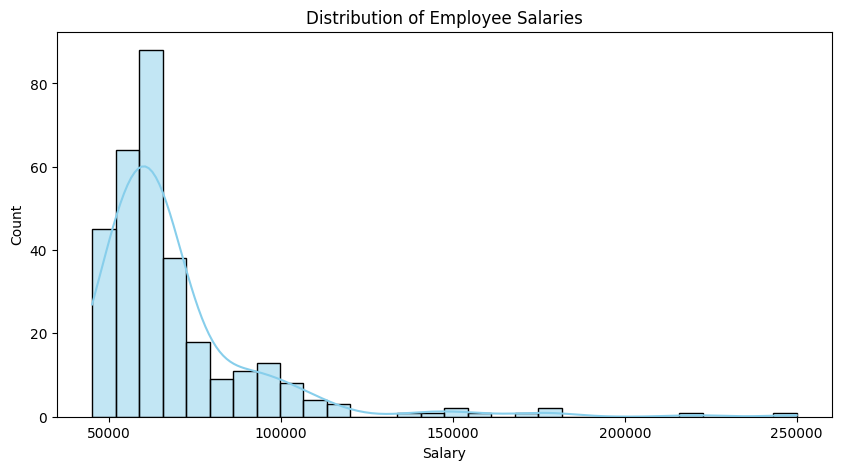

In [377]:
# Distribution of Salary
plt.figure(figsize=(10,5))
sns.histplot(hr["Salary"], bins=30, kde=True, color="skyblue", edgecolor="black")
plt.title("Distribution of Employee Salaries")
plt.xlabel("Salary")
plt.ylabel("Count")
plt.show()


In [378]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 1 to 311
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee_Name               311 non-null    object 
 1   EmpID                       311 non-null    int64  
 2   MarriedID                   311 non-null    int64  
 3   MaritalStatusID             311 non-null    int64  
 4   GenderID                    311 non-null    int64  
 5   EmpStatusID                 311 non-null    int64  
 6   DeptID                      311 non-null    int64  
 7   PerfScoreID                 311 non-null    int64  
 8   FromDiversityJobFairID      311 non-null    int64  
 9   Salary                      311 non-null    int64  
 10  Termd                       311 non-null    int64  
 11  PositionID                  311 non-null    int64  
 12  Position                    311 non-null    object 
 13  State                       311 non

In [379]:
hr.head(2)

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
1,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
2,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17


In [380]:
#What is the average age of employees at the company? (Use DOB column).
#start by converting DOB to datetime
from datetime import datetime
hr["DOB"]=pd.to_datetime(hr["DOB"],errors='coerce')

C:\Users\ADEN\AppData\Local\Temp\ipykernel_6084\1486199280.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  hr["DOB"]=pd.to_datetime(hr["DOB"],errors='coerce')


In [381]:
#Get today's date
current_date =pd.Timestamp.today()
hr['Age'] = current_date.year - hr['DOB'].dt.year



In [382]:
average_age=hr["Age"].mean()
print(average_age)

17.14790996784566


In [383]:
hr.head(50).T

,1,2,3,4,5,6,7,8,9,10,...,41,42,43,44,45,46,47,48,49,50
Employee_Name,"Adinolfi, Wilson K","Ait Sidi, Karthikeyan","Akinkuolie, Sarah","Alagbe,Trina","Anderson, Carol","Anderson, Linda","Andreola, Colby","Athwal, Sam","Bachiochi, Linda","Bacong, Alejandro",...,"Carter, Michelle","Chace, Beatrice","Champaigne, Brian","Chan, Lin","Chang, Donovan E","Chigurh, Anton","Chivukula, Enola","Cierpiszewski, Caroline","Clayton, Rick","Cloninger, Jennifer"
EmpID,10026,10084,10196,10088,10069,10002,10194,10062,10114,10250,...,10040,10067,10108,10210,10154,10200,10240,10168,10220,10275
MarriedID,0,1,1,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
MaritalStatusID,0,1,1,1,2,0,0,4,0,2,...,0,0,1,0,0,0,0,0,0,1
GenderID,1,1,0,0,0,0,0,1,0,1,...,0,0,1,0,1,1,0,0,1,0
EmpStatusID,1,5,5,1,5,1,1,1,3,1,...,1,1,1,1,1,1,5,1,1,5
DeptID,5,3,5,5,5,5,4,5,5,3,...,6,5,3,5,5,6,5,5,3,5
PerfScoreID,4,3,3,3,3,4,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
FromDiversityJobFairID,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
Salary,62506,104437,64955,64991,50825,57568,95660,59365,47837,50178,...,71860,61656,110929,54237,60380,66808,64786,64816,68678,64066


In [384]:
#Calculate the average age
average_age=hr["Age"].mean()
print(f"The average age in the company would be: {average_age:.2f} years")

The average age in the company would be: 17.15 years


In [385]:
#How many employees are still employed vs terminated?
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 1 to 311
Data columns (total 37 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Employee_Name               311 non-null    object        
 1   EmpID                       311 non-null    int64         
 2   MarriedID                   311 non-null    int64         
 3   MaritalStatusID             311 non-null    int64         
 4   GenderID                    311 non-null    int64         
 5   EmpStatusID                 311 non-null    int64         
 6   DeptID                      311 non-null    int64         
 7   PerfScoreID                 311 non-null    int64         
 8   FromDiversityJobFairID      311 non-null    int64         
 9   Salary                      311 non-null    int64         
 10  Termd                       311 non-null    int64         
 11  PositionID                  311 non-null    int64         

In [386]:
#checking the sample on the termination date column
hr[["Termd", "DateofTermination"]].sample(10)


,Termd,DateofTermination
213,1,9/7/2015
223,0,NaN
229,0,NaN
15,1,4/6/2017
161,0,NaN
247,0,NaN
13,0,NaN
67,0,NaN
17,0,NaN
292,0,NaN


In [387]:
#How many employees are still employed vs terminated?
terminated=hr["Termd"].value_counts()
print(terminated)

Termd
0    207
1    104
Name: count, dtype: int64


In [388]:
employed=hr[hr["Termd"]==0].shape[0]

In [389]:
terminated_emp=hr[hr["Termd"]==1].shape[0]

In [390]:
print(f"There are {employed} employees who are still active and {terminated_emp} former employees whose contracts have been terminated")

There are 207 employees who are still active and 104 former employees whose contracts have been terminated


In [391]:
#Which departments have the most employees?
#check the unique values at department first
print(hr["Department"].unique())


['Production       ' 'IT/IS' 'Software Engineering' 'Admin Offices'
 'Sales' 'Executive Office']


In [392]:
#Stripping the department
hr["Department"] = hr["Department"].str.strip()

In [393]:
print(hr['Department'].unique())

['Production' 'IT/IS' 'Software Engineering' 'Admin Offices' 'Sales'
 'Executive Office']


In [394]:
dept_count=hr['Department'].value_counts().reset_index()
print(dept_count)

             Department  count
0            Production    209
1                 IT/IS     50
2                 Sales     31
3  Software Engineering     11
4         Admin Offices      9
5      Executive Office      1


In [395]:
print(hr['Department'].value_counts().reset_index())

             Department  count
0            Production    209
1                 IT/IS     50
2                 Sales     31
3  Software Engineering     11
4         Admin Offices      9
5      Executive Office      1


In [396]:
#Cleaner Column
dept_count.columns=["Department","Count"]
print(dept_count)

             Department  Count
0            Production    209
1                 IT/IS     50
2                 Sales     31
3  Software Engineering     11
4         Admin Offices      9
5      Executive Office      1


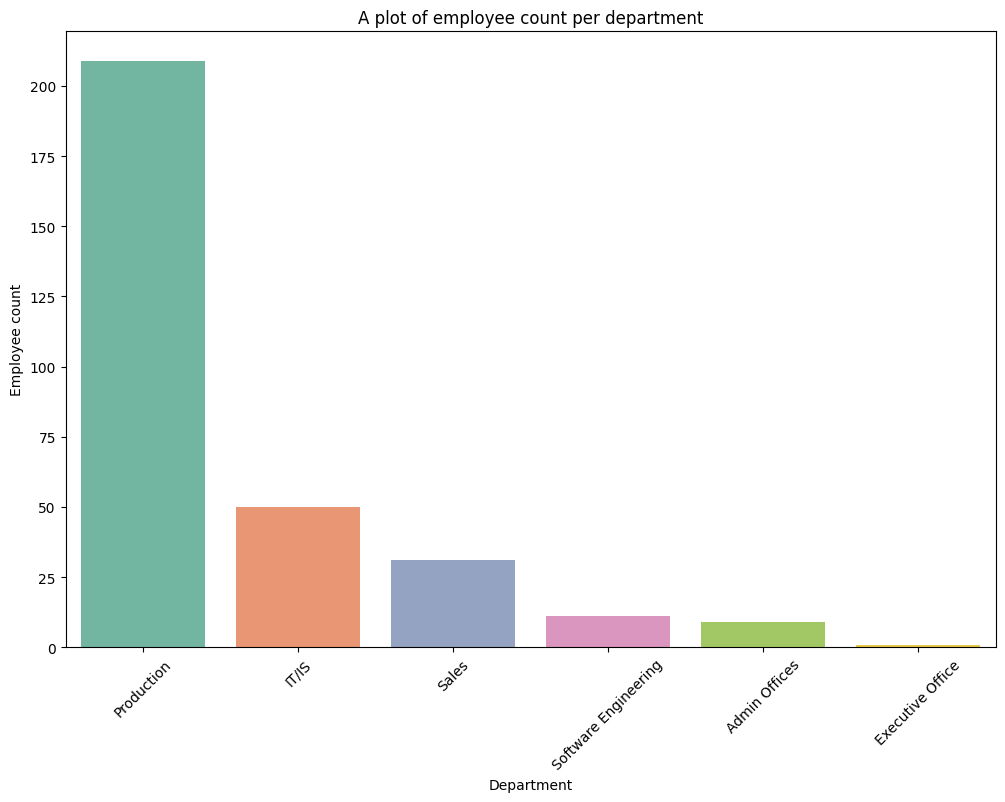

In [397]:
#plotting using seaborn to determine which department had the most employees
plt.figure(figsize=(12,8))
sns.barplot(data=dept_count, x="Department", y="Count",hue="Department", palette="Set2")
plt.title("A plot of employee count per department")
plt.xlabel("Department")
plt.ylabel("Employee count")
plt.xticks(rotation=45)
plt.show()

#### Part B: Business Analysis

In [398]:
#What is the average salary per department?
avg_salary =hr.groupby("Department")["Salary"].mean().reset_index()
print(avg_salary)

             Department         Salary
0         Admin Offices   71791.888889
1      Executive Office  250000.000000
2                 IT/IS   97064.640000
3            Production   59953.545455
4                 Sales   69061.258065
5  Software Engineering   94989.454545


In [399]:
#Find the distribution of employment status (Active, Voluntarily Terminated, etc.
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 1 to 311
Data columns (total 37 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Employee_Name               311 non-null    object        
 1   EmpID                       311 non-null    int64         
 2   MarriedID                   311 non-null    int64         
 3   MaritalStatusID             311 non-null    int64         
 4   GenderID                    311 non-null    int64         
 5   EmpStatusID                 311 non-null    int64         
 6   DeptID                      311 non-null    int64         
 7   PerfScoreID                 311 non-null    int64         
 8   FromDiversityJobFairID      311 non-null    int64         
 9   Salary                      311 non-null    int64         
 10  Termd                       311 non-null    int64         
 11  PositionID                  311 non-null    int64         

In [400]:
print(hr["EmploymentStatus"].unique())

['Active' 'Voluntarily Terminated' 'Terminated for Cause']


In [401]:
status_count=hr["EmploymentStatus"].value_counts()
print(status_count)

EmploymentStatus
Active                    207
Voluntarily Terminated     88
Terminated for Cause       16
Name: count, dtype: int64


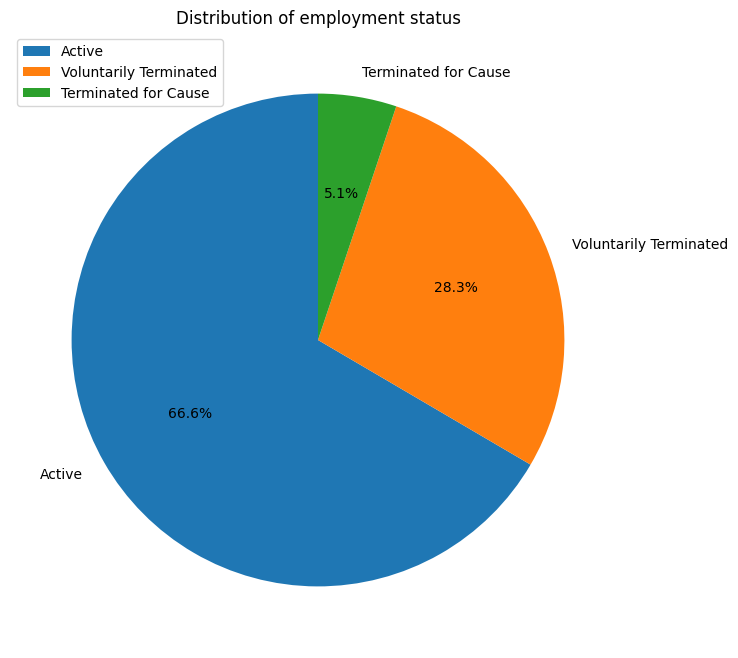

In [402]:
#plotting a pie chart of distribution of employment status
plt.figure(figsize=(8,8))
plt.pie(status_count.values, labels=status_count.index,autopct='%1.1f%%' ,startangle=90)
plt.title("Distribution of employment status")
plt.legend()
plt.show()

In [403]:
#Compare salary levels between Male and Female employees.
salary_count = hr['Sex'].value_counts().reset_index()
print(salary_count)

  Sex  count
0   F    176
1  M     135


In [404]:
hr.head(2)

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences,Age
1,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1,42
2,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17,50


In [405]:
print(hr["Sex"].unique())

['M ' 'F']


In [406]:
#Calculating average salary per gender
avg_salary_gender = hr.groupby("Sex")["Salary"].mean()
print(avg_salary_gender)

Sex
F     67786.727273
M     70629.400000
Name: Salary, dtype: float64


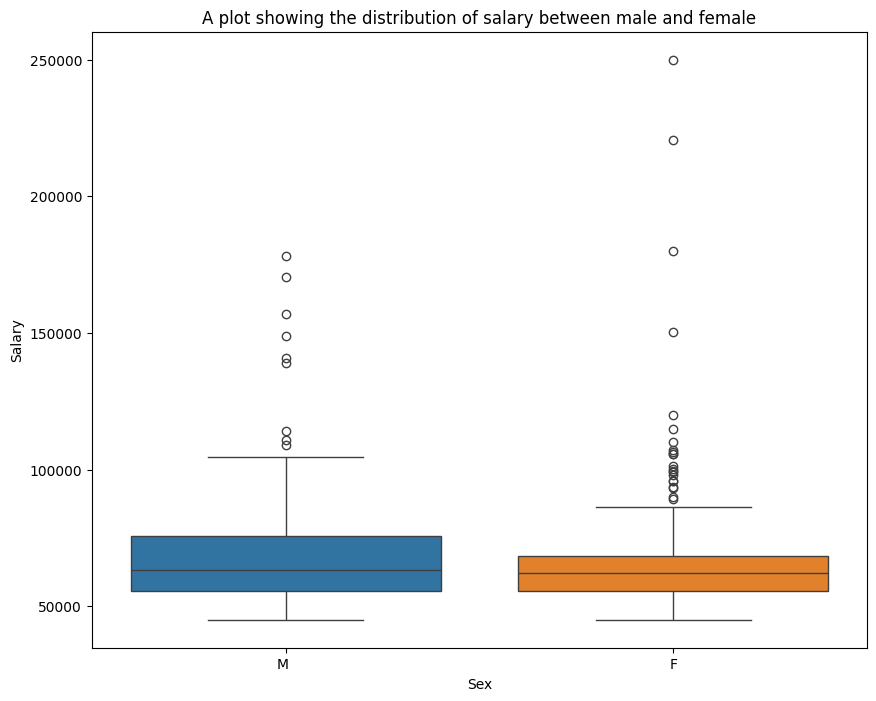

In [407]:
#Plot a boxplot to show the levels between male's and female's
plt.figure(figsize=(10,8))
sns.boxplot(data=hr, x="Sex",y="Salary", hue="Sex")
plt.title(f"A plot showing the distribution of salary between male and female")
plt.xlabel("Sex")
plt.ylabel("Salary")
plt.show()

In [408]:
#Which recruitment source brings in the most employees?
print(hr["RecruitmentSource"].value_counts().reset_index())

         RecruitmentSource  count
0                   Indeed     87
1                 LinkedIn     76
2            Google Search     49
3        Employee Referral     31
4       Diversity Job Fair     29
5            CareerBuilder     23
6                  Website     13
7                    Other      2
8  On-line Web application      1


###### Indeed brings most of the employment to the comapny with 87

In [409]:
#Another way
most_rec=hr["RecruitmentSource"].value_counts()
print(most_rec)

RecruitmentSource
Indeed                     87
LinkedIn                   76
Google Search              49
Employee Referral          31
Diversity Job Fair         29
CareerBuilder              23
Website                    13
Other                       2
On-line Web application     1
Name: count, dtype: int64


In [410]:
top_most_rec=most_rec.idxmax()
print(top_most_rec)

Indeed


In [411]:
#What percentage of employees attended a Diversity Job Fair?
print(hr["FromDiversityJobFairID"].unique())

[0 1]


In [412]:
diversity_count = hr["FromDiversityJobFairID"].value_counts()
print(diversity_count)

FromDiversityJobFairID
0    282
1     29
Name: count, dtype: int64


In [413]:
# Treat 0 as did not attended
percentage_attended = (hr['FromDiversityJobFairID'] == 0).mean() * 100
print(f"{percentage_attended:.1f}% of employees did not attend a Diversity job fair")


90.7% of employees did not attend a Diversity job fair


In [414]:
# Treat 1 as attended
percentage_attended = (hr['FromDiversityJobFairID'] == 1).mean() * 100
print(f"{percentage_attended:.2f}% of employees did attend the Diversity job fair")


9.32% of employees did attend the Diversity job fair


In [415]:
#Compare engagement survey scores across different departments using a barchart.
average_engagement = hr.groupby("Department")["EngagementSurvey"].mean().reset_index()
print(average_engagement)

             Department  EngagementSurvey
0         Admin Offices          4.393333
1      Executive Office          4.830000
2                 IT/IS          4.154000
3            Production          4.129569
4                 Sales          3.818710
5  Software Engineering          4.061818


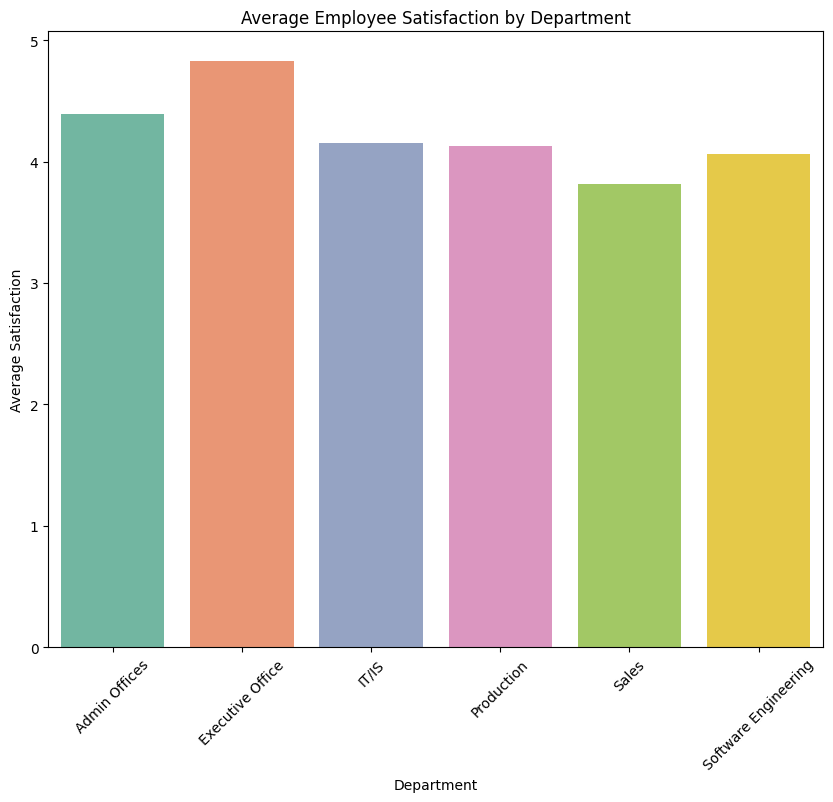

In [416]:

plt.figure(figsize=(10,8))
sns.barplot(data=average_engagement,x="Department",y="EngagementSurvey" ,hue = "Department",palette='Set2')
plt.title("Average Employee Satisfaction by Department")
plt.xlabel("Department")
plt.ylabel("Average Satisfaction")
plt.xticks(rotation=45)
plt.show()

In [417]:
#Which race has the highest average salary?
average_race_salary = hr.groupby("RaceDesc")["Salary"].mean().reset_index()
print(average_race_salary)

                           RaceDesc        Salary
0  American Indian or Alaska Native  65806.000000
1                             Asian  68521.206897
2         Black or African American  74431.025000
3                          Hispanic  83667.000000
4                 Two or more races  59998.181818
5                             White  67287.545455


In [418]:
average_sorted_list=average_race_salary.sort_values(by="Salary",ascending=False)
print(average_sorted_list)

                           RaceDesc        Salary
3                          Hispanic  83667.000000
2         Black or African American  74431.025000
1                             Asian  68521.206897
5                             White  67287.545455
0  American Indian or Alaska Native  65806.000000
4                 Two or more races  59998.181818


In [419]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 1 to 311
Data columns (total 37 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Employee_Name               311 non-null    object        
 1   EmpID                       311 non-null    int64         
 2   MarriedID                   311 non-null    int64         
 3   MaritalStatusID             311 non-null    int64         
 4   GenderID                    311 non-null    int64         
 5   EmpStatusID                 311 non-null    int64         
 6   DeptID                      311 non-null    int64         
 7   PerfScoreID                 311 non-null    int64         
 8   FromDiversityJobFairID      311 non-null    int64         
 9   Salary                      311 non-null    int64         
 10  Termd                       311 non-null    int64         
 11  PositionID                  311 non-null    int64         

In [420]:
#What is the relationship between number of projects (SpecialProjectsCount) and salary?
print(hr["SpecialProjectsCount"].value_counts())

SpecialProjectsCount
0    241
6     21
5     21
7     12
4      9
3      3
8      2
2      1
1      1
Name: count, dtype: int64


In [421]:
print(hr["SpecialProjectsCount"].unique())

[0 6 4 5 7 3 8 2 1]


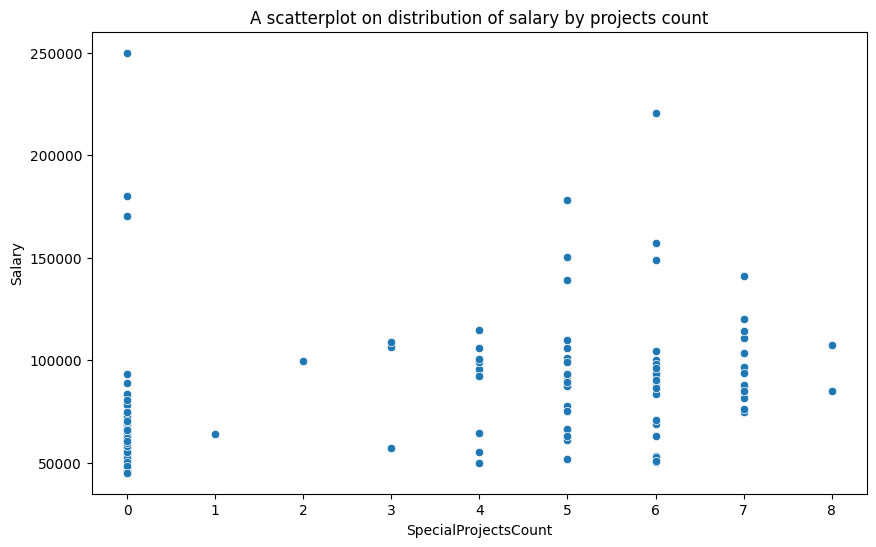

In [422]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x="SpecialProjectsCount", y="Salary", data=hr)
plt.title("A scatterplot on distribution of salary by projects count")
plt.xlabel("SpecialProjectsCount")
plt.ylabel("Salary")
plt.show()

In [423]:
#Do married employees earn more on average than single employees?
num_cols=hr.select_dtypes(include="number").columns
print(num_cols)

Index(['EmpID', 'MarriedID', 'MaritalStatusID', 'GenderID', 'EmpStatusID',
       'DeptID', 'PerfScoreID', 'FromDiversityJobFairID', 'Salary', 'Termd',
       'PositionID', 'Zip', 'ManagerID', 'EngagementSurvey', 'EmpSatisfaction',
       'SpecialProjectsCount', 'DaysLateLast30', 'Absences', 'Age'],
      dtype='object')


In [424]:
print(hr["MarriedID"].unique())

[0 1]


In [425]:
print(hr["MarriedID"].value_counts().reset_index())

   MarriedID  count
0          0    187
1          1    124


In [426]:
#Mapping to convert numeric codes to labels
hr['MarriedID'] = hr['MarriedID'].map({0: "Single", 1: "Married"})

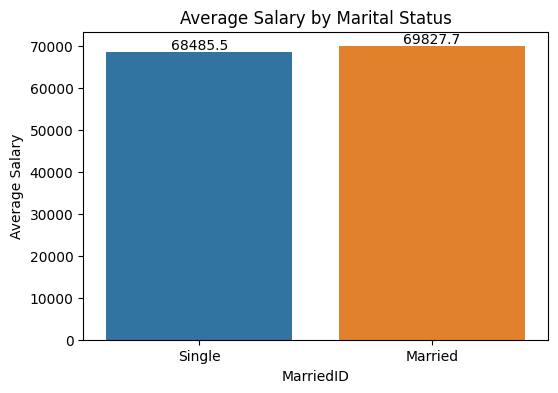

In [427]:
# Plot average salary by marital status

plt.figure(figsize=(6,4))
ax=sns.barplot(x='MarriedID', y='Salary', data=hr, errorbar=None, hue="MarriedID")
# Use ax (not hr) to label bars
for container in ax.containers:
    ax.bar_label(container, fontsize=10)

plt.title("Average Salary by Marital Status")
plt.ylabel("Average Salary")
plt.xlabel("MarriedID")
plt.show()

###### Despite the single people being more than the married people in the company, they slightly earned less to the married people on average.

In [428]:
#Which managers have the largest teams?
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 1 to 311
Data columns (total 37 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Employee_Name               311 non-null    object        
 1   EmpID                       311 non-null    int64         
 2   MarriedID                   311 non-null    object        
 3   MaritalStatusID             311 non-null    int64         
 4   GenderID                    311 non-null    int64         
 5   EmpStatusID                 311 non-null    int64         
 6   DeptID                      311 non-null    int64         
 7   PerfScoreID                 311 non-null    int64         
 8   FromDiversityJobFairID      311 non-null    int64         
 9   Salary                      311 non-null    int64         
 10  Termd                       311 non-null    int64         
 11  PositionID                  311 non-null    int64         

In [429]:
#count how many employees report to each manager.
largest_team = (hr.groupby("ManagerName")["EmpID"].count().sort_values(ascending=False).reset_index())

In [430]:
print(largest_team)

           ManagerName  EmpID
0       Brannon Miller     22
1        Kelley Spirea     22
2       Kissy Sullivan     22
3       Michael Albert     22
4         Elijiah Gray     22
5        Ketsia Liebig     21
6        David Stanley     21
7       Webster Butler     21
8             Amy Dunn     21
9           Janet King     19
10          Simon Roup     17
11        Peter Monroe     14
12          John Smith     14
13       Lynn Daneault     13
14     Alex Sweetwater      9
15    Brian Champaigne      8
16  Brandon R. LeBlanc      7
17     Jennifer Zamora      7
18        Eric Dougall      4
19      Debra Houlihan      3
20  Board of Directors      2


In [431]:
#Managers with the largest teams are;
print(largest_team.head(5))

      ManagerName  EmpID
0  Brannon Miller     22
1   Kelley Spirea     22
2  Kissy Sullivan     22
3  Michael Albert     22
4    Elijiah Gray     22


### Part C: Data Visualization


In [432]:
#Plot the salary distribution using histograms.
num_cols=hr.select_dtypes(include="number").columns
print(num_cols)

Index(['EmpID', 'MaritalStatusID', 'GenderID', 'EmpStatusID', 'DeptID',
       'PerfScoreID', 'FromDiversityJobFairID', 'Salary', 'Termd',
       'PositionID', 'Zip', 'ManagerID', 'EngagementSurvey', 'EmpSatisfaction',
       'SpecialProjectsCount', 'DaysLateLast30', 'Absences', 'Age'],
      dtype='object')


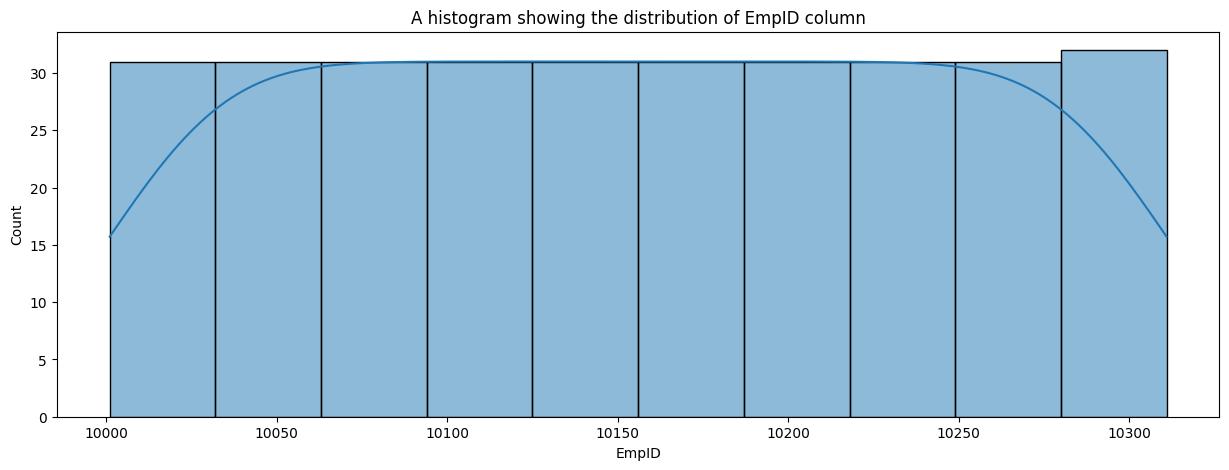

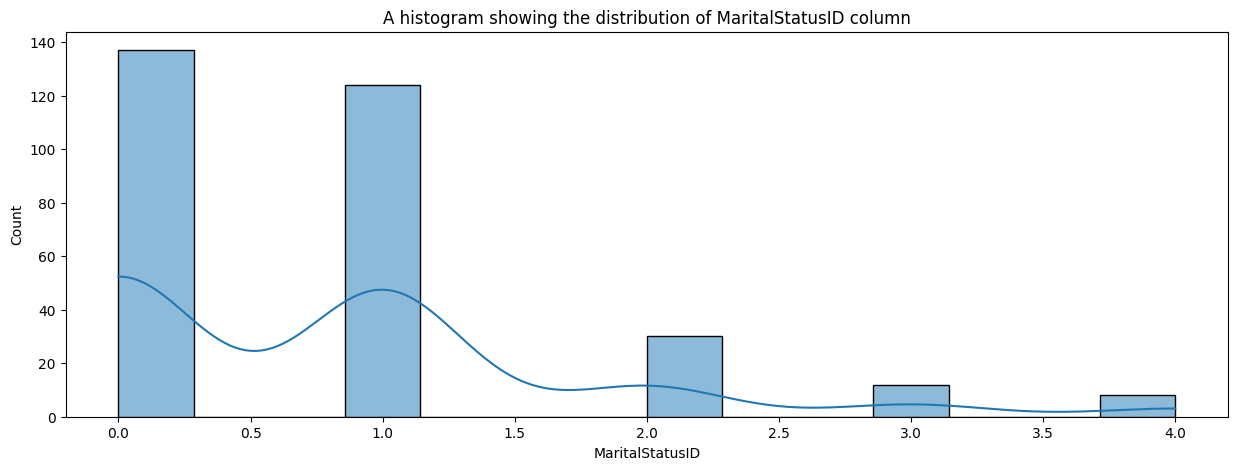

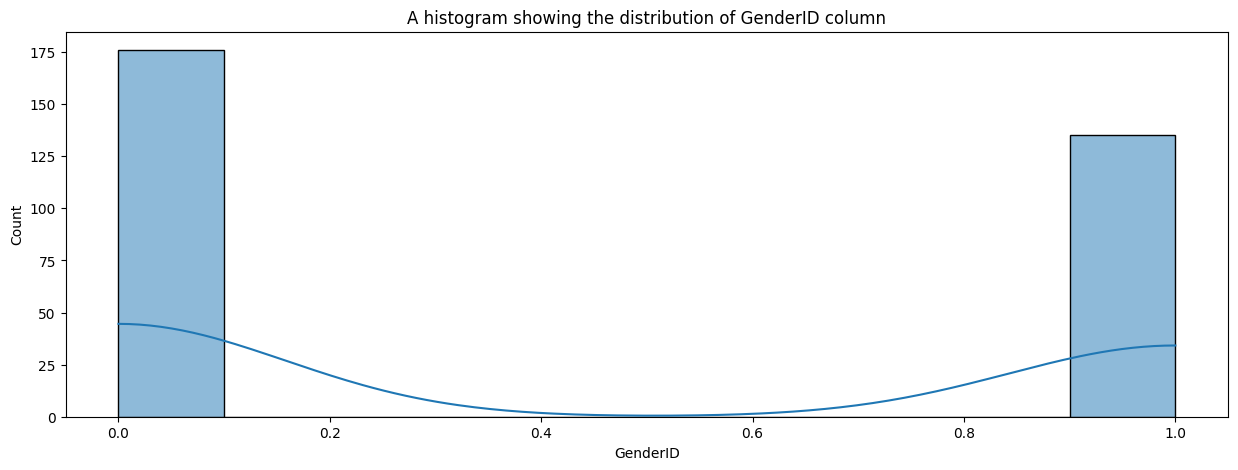

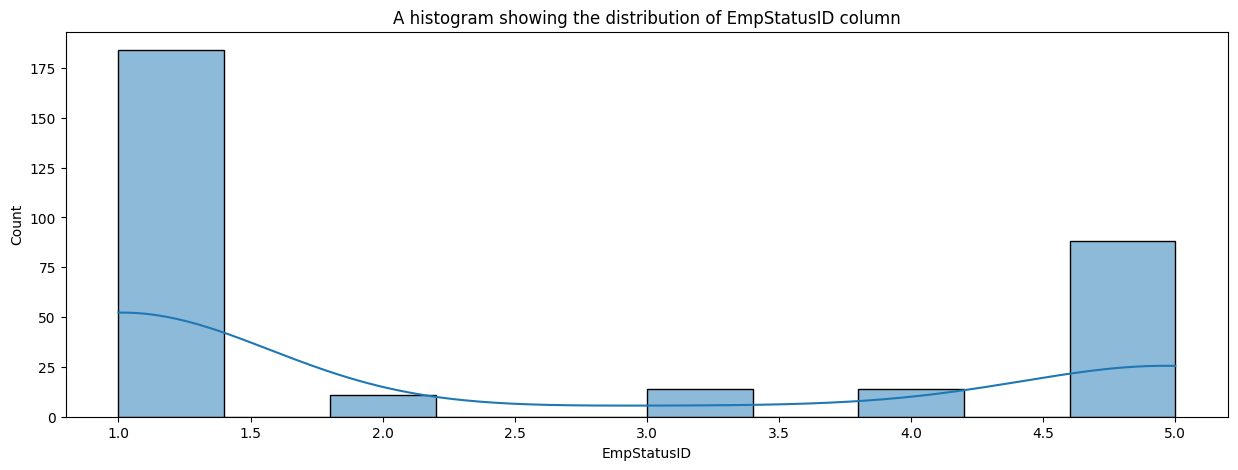

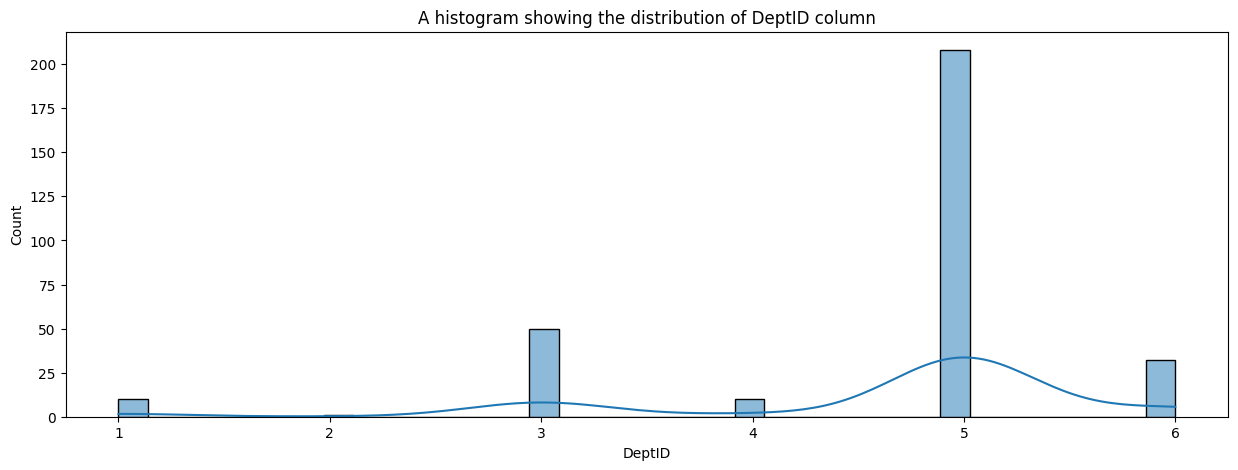

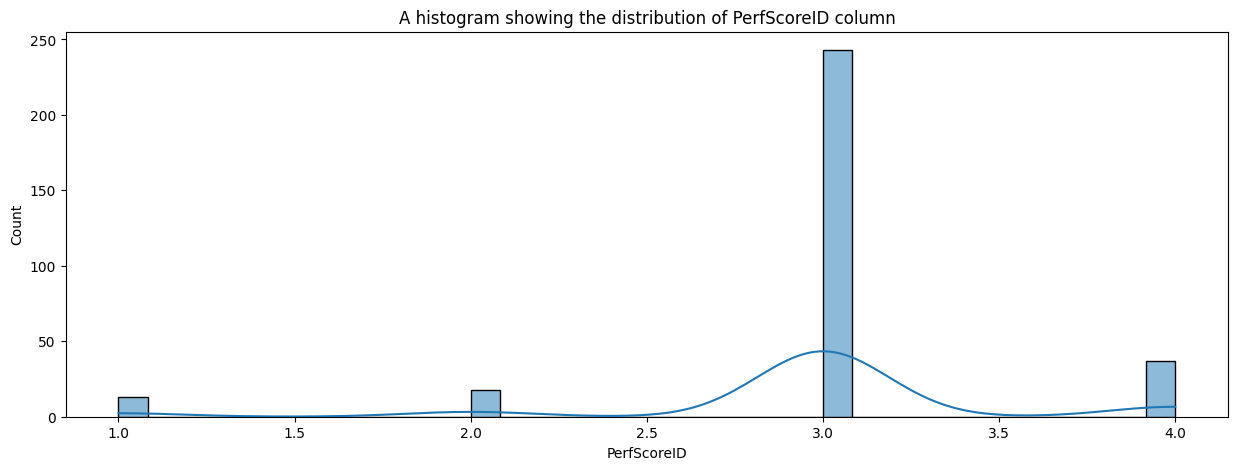

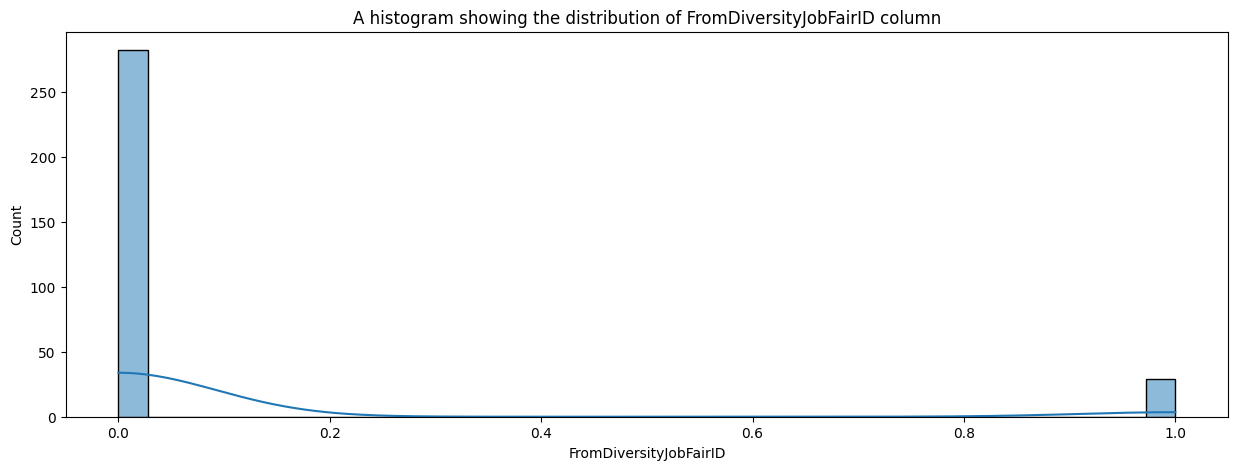

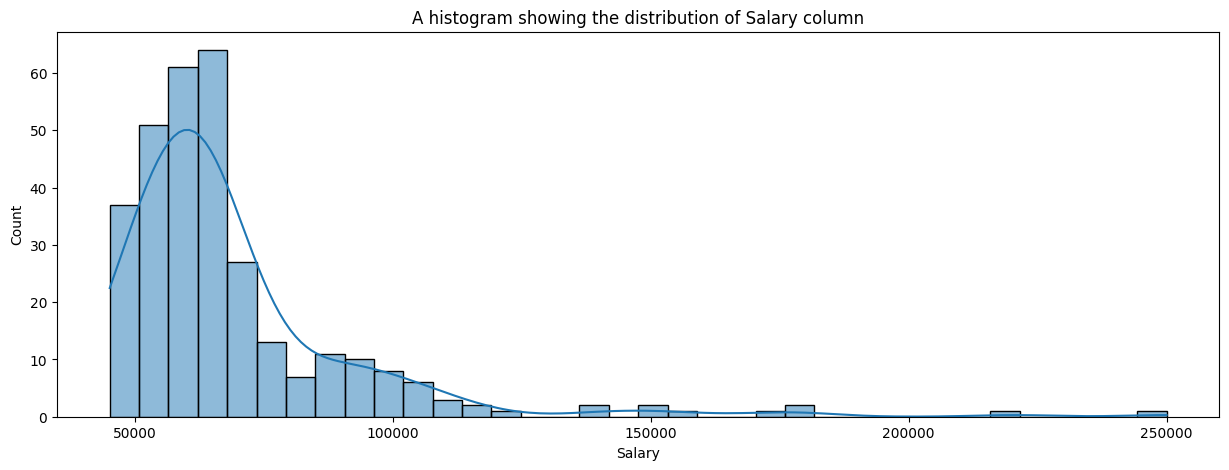

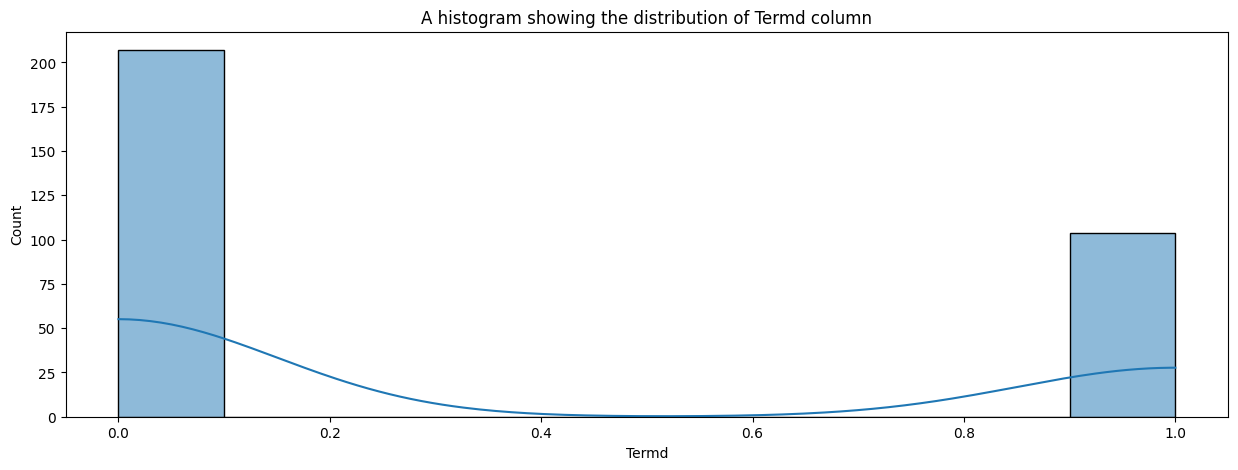

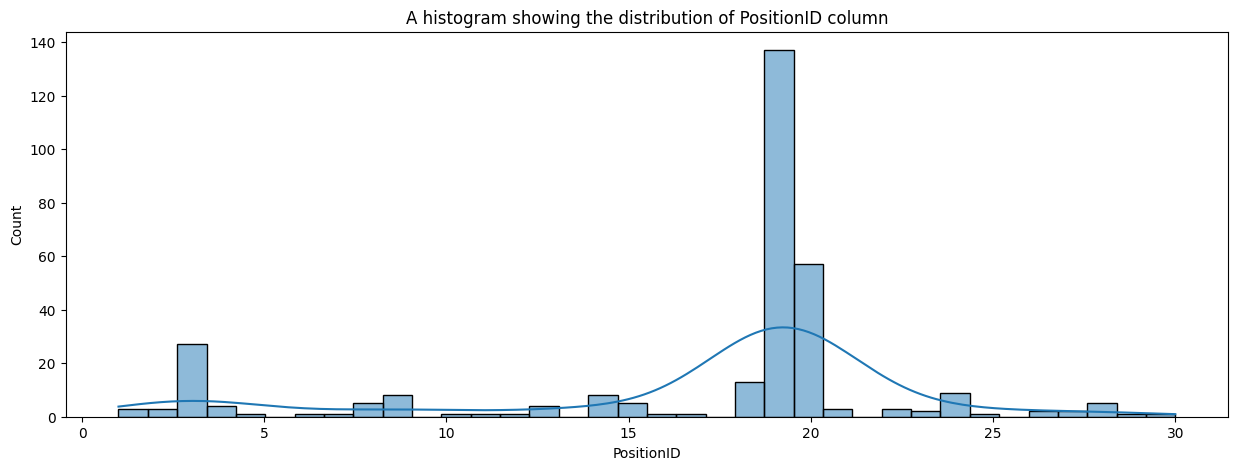

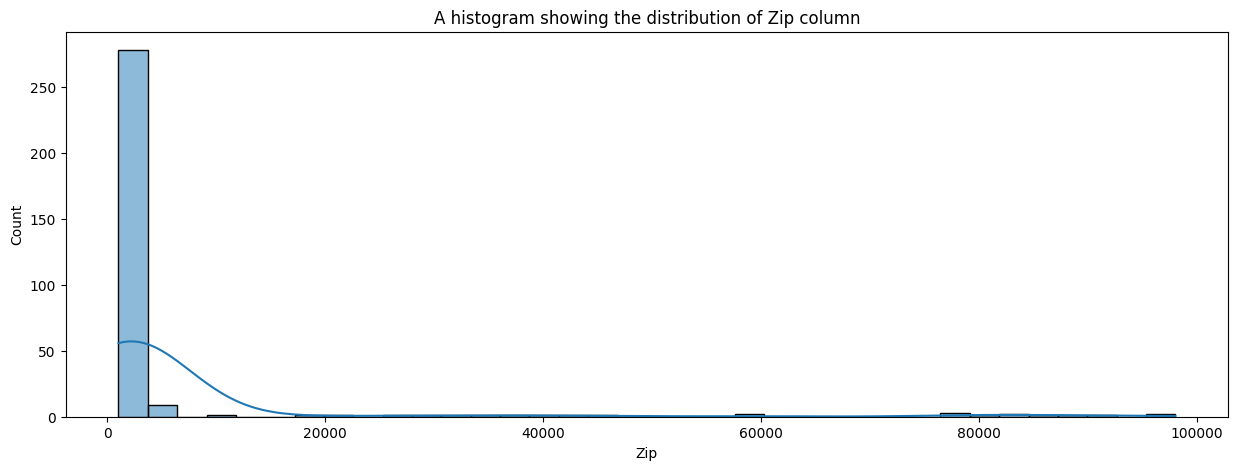

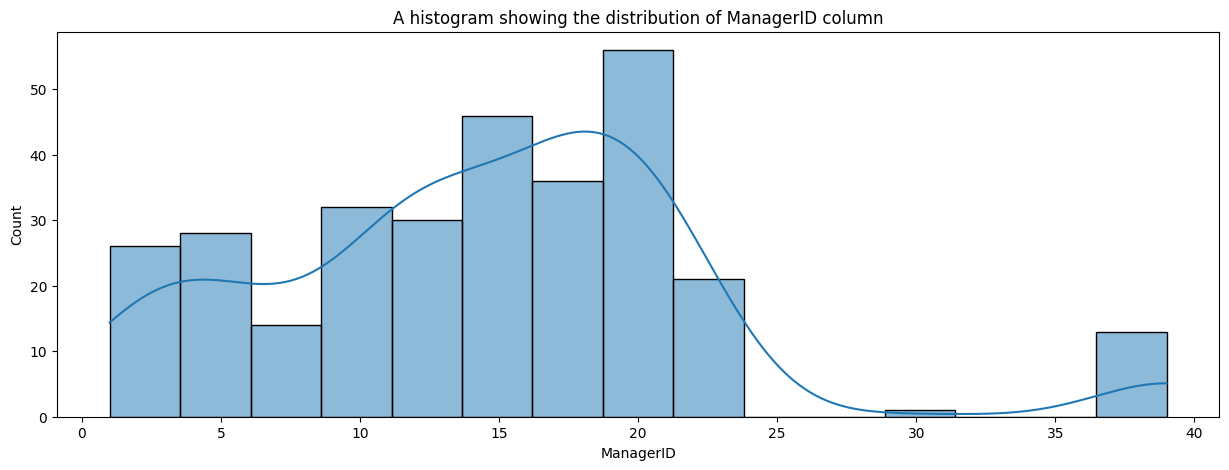

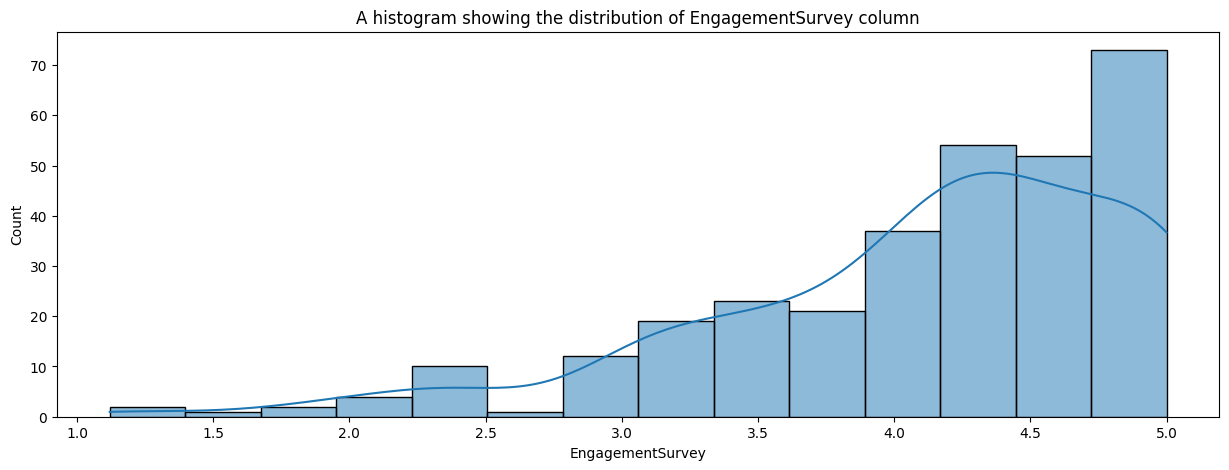

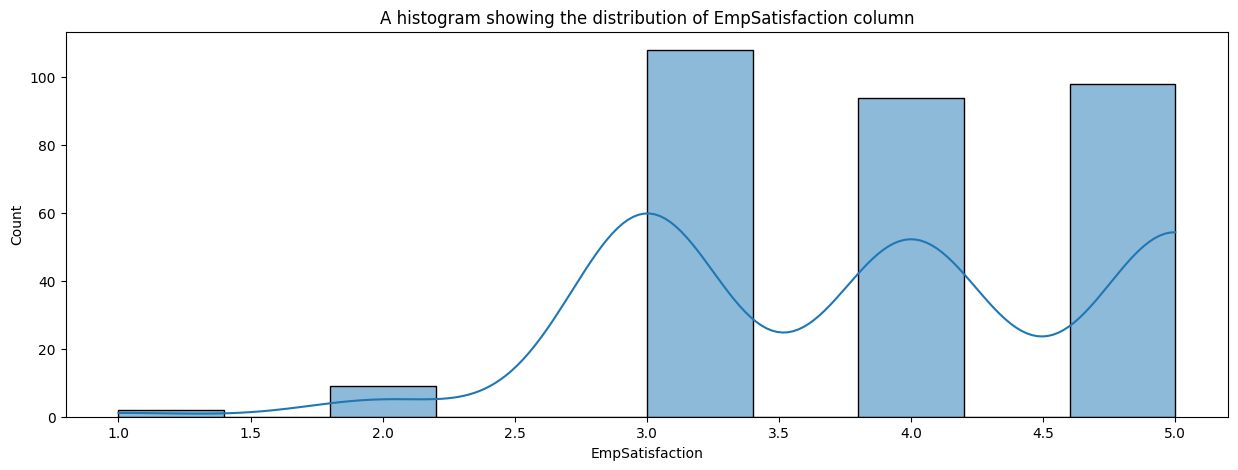

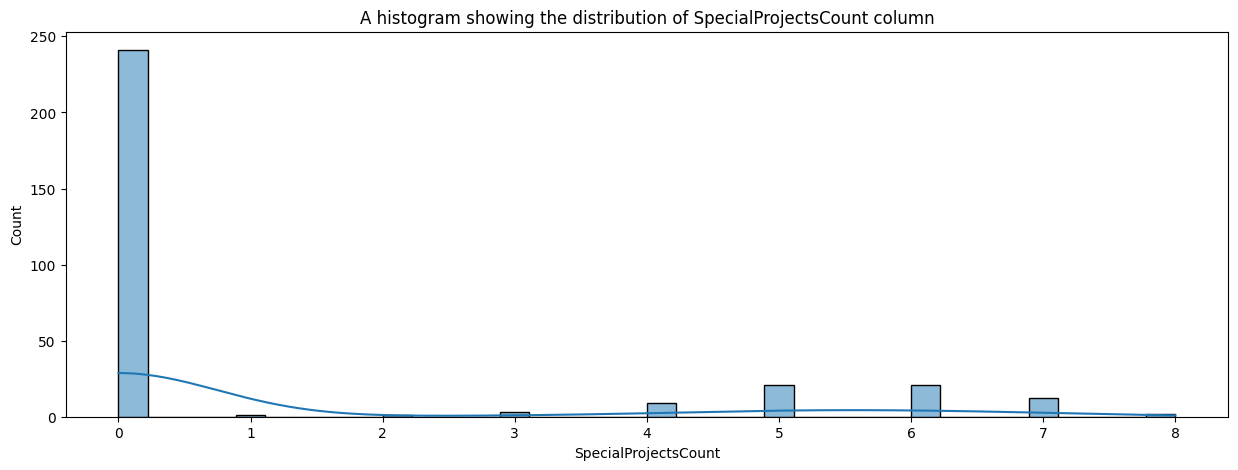

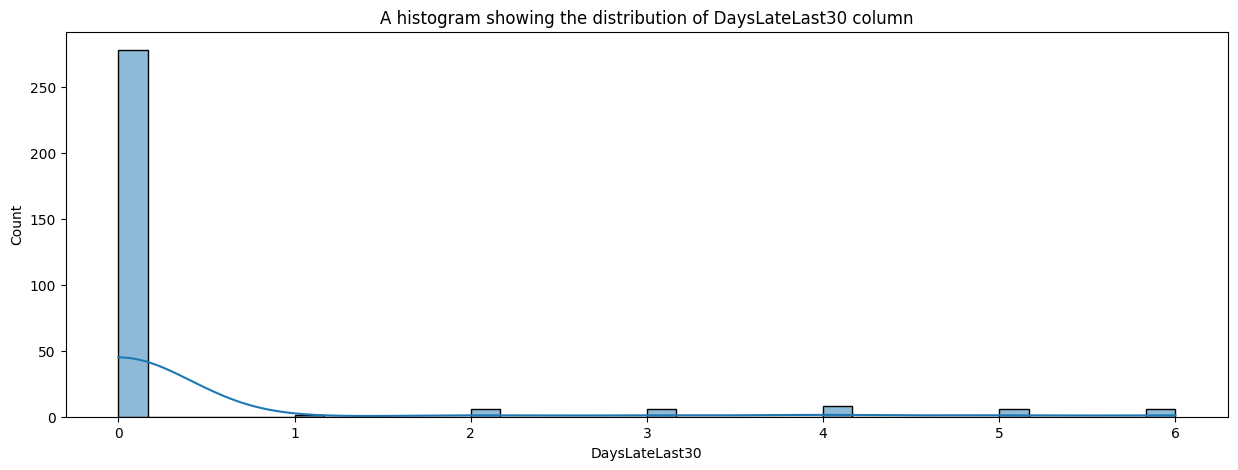

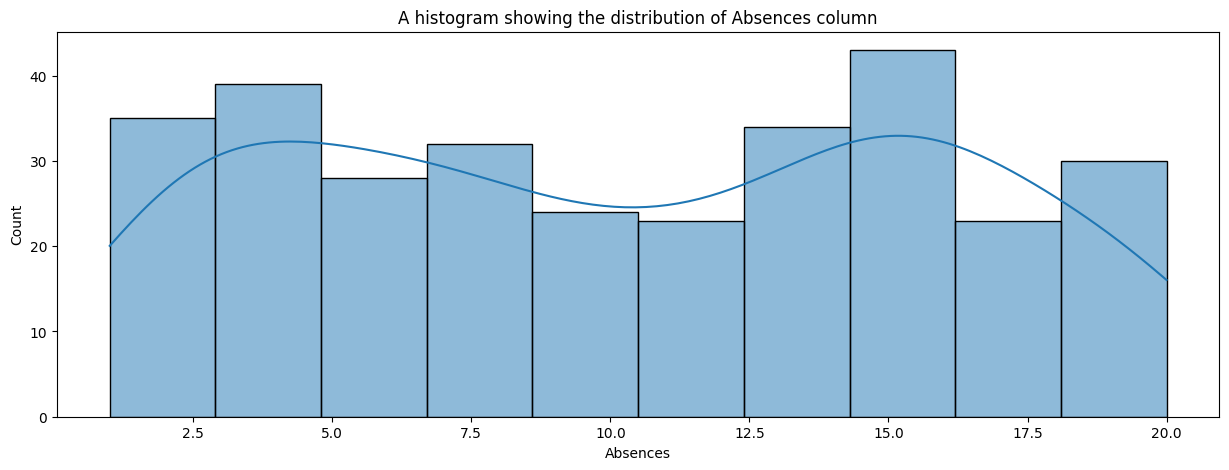

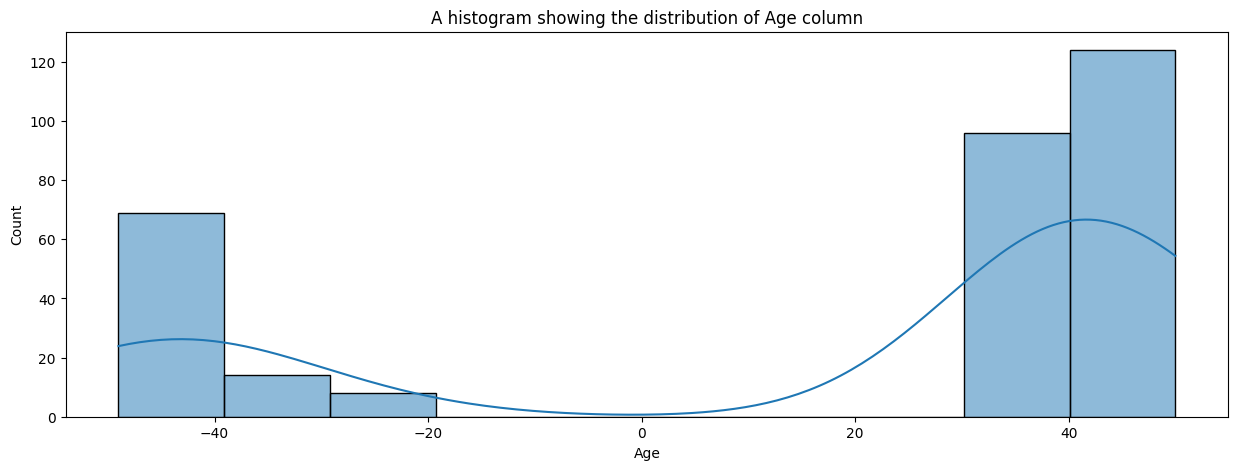

In [433]:
#Plotting a boxplot and a histplot of numerical columns
for col in num_cols:
    plt.figure(figsize=(15,5))
    sns.histplot(data=hr, x=col,kde=True)
    plt.title(f"A histogram showing the distribution of {col} column")
    plt.xlabel(f"{col}")

In [434]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 1 to 311
Data columns (total 37 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Employee_Name               311 non-null    object        
 1   EmpID                       311 non-null    int64         
 2   MarriedID                   311 non-null    object        
 3   MaritalStatusID             311 non-null    int64         
 4   GenderID                    311 non-null    int64         
 5   EmpStatusID                 311 non-null    int64         
 6   DeptID                      311 non-null    int64         
 7   PerfScoreID                 311 non-null    int64         
 8   FromDiversityJobFairID      311 non-null    int64         
 9   Salary                      311 non-null    int64         
 10  Termd                       311 non-null    int64         
 11  PositionID                  311 non-null    int64         

In [435]:
#The count of employees per dept
department_count=hr['Department'].value_counts()
print(department_count)

Department
Production              209
IT/IS                    50
Sales                    31
Software Engineering     11
Admin Offices             9
Executive Office          1
Name: count, dtype: int64


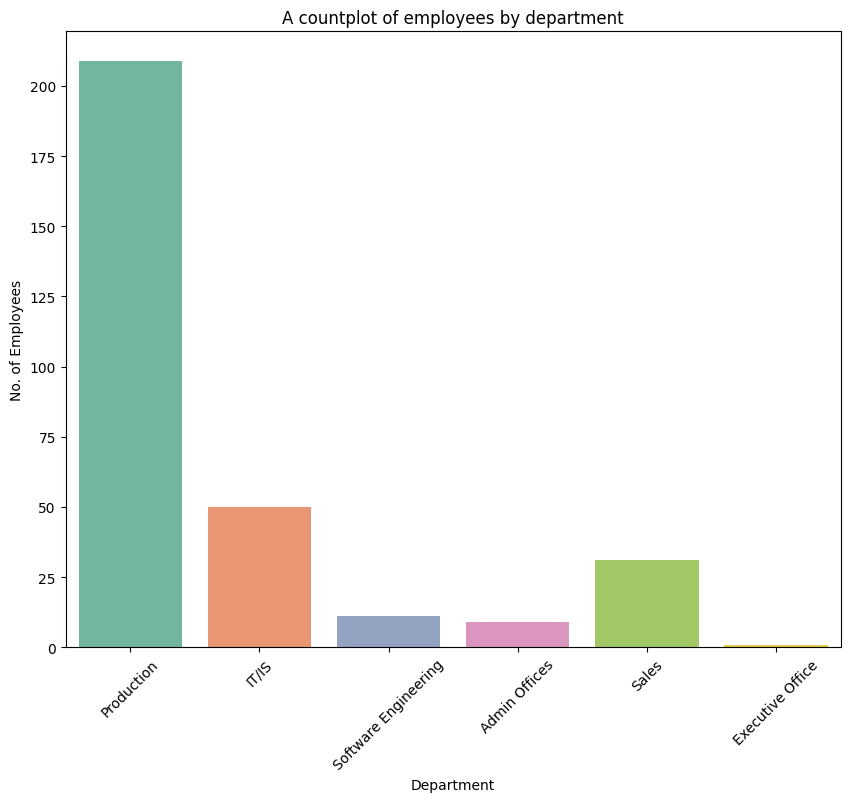

In [436]:
#Show the count of employees by department.
plt.figure(figsize=(10,8))
sns.countplot(data=hr, x="Department",hue="Department",palette="Set2")
plt.title("A countplot of employees by department")
plt.xlabel("Department")
plt.ylabel("No. of Employees")
plt.xticks(rotation=45)
plt.show()

In [437]:
print(hr['Department'].value_counts())

Department
Production              209
IT/IS                    50
Sales                    31
Software Engineering     11
Admin Offices             9
Executive Office          1
Name: count, dtype: int64


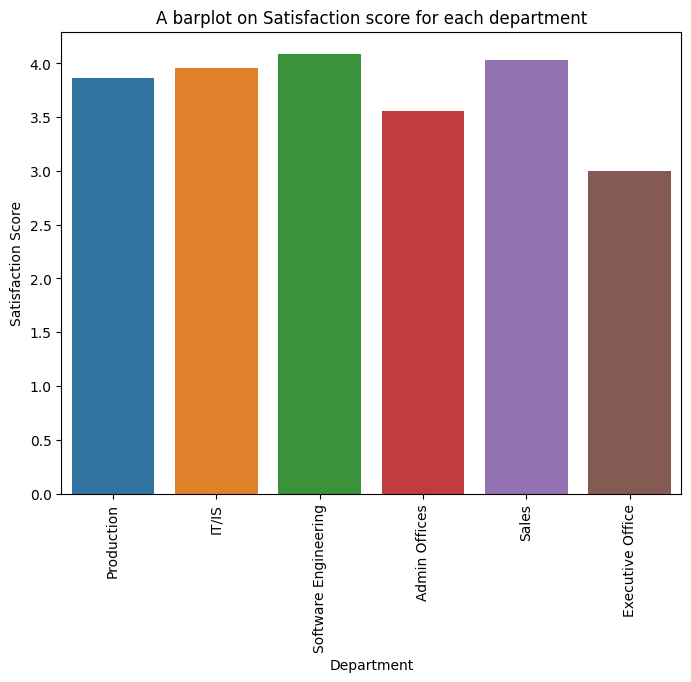

In [438]:
#Compare average satisfaction score by department.
plt.figure(figsize=(8,6))
sns.barplot(data=hr, x="Department", y="EmpSatisfaction",errorbar=None,hue="Department", legend=False)
plt.title("A barplot on Satisfaction score for each department")
plt.xlabel("Department")
plt.ylabel("Satisfaction Score")
plt.xticks(rotation=90)
plt.show()

In [439]:
#Visualize employee terminations over time.
#convert to datetime(the termd column)
hr['Termd']=pd.to_datetime(hr['Termd'], errors="coerce")

In [440]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 1 to 311
Data columns (total 37 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Employee_Name               311 non-null    object        
 1   EmpID                       311 non-null    int64         
 2   MarriedID                   311 non-null    object        
 3   MaritalStatusID             311 non-null    int64         
 4   GenderID                    311 non-null    int64         
 5   EmpStatusID                 311 non-null    int64         
 6   DeptID                      311 non-null    int64         
 7   PerfScoreID                 311 non-null    int64         
 8   FromDiversityJobFairID      311 non-null    int64         
 9   Salary                      311 non-null    int64         
 10  Termd                       311 non-null    datetime64[ns]
 11  PositionID                  311 non-null    int64         

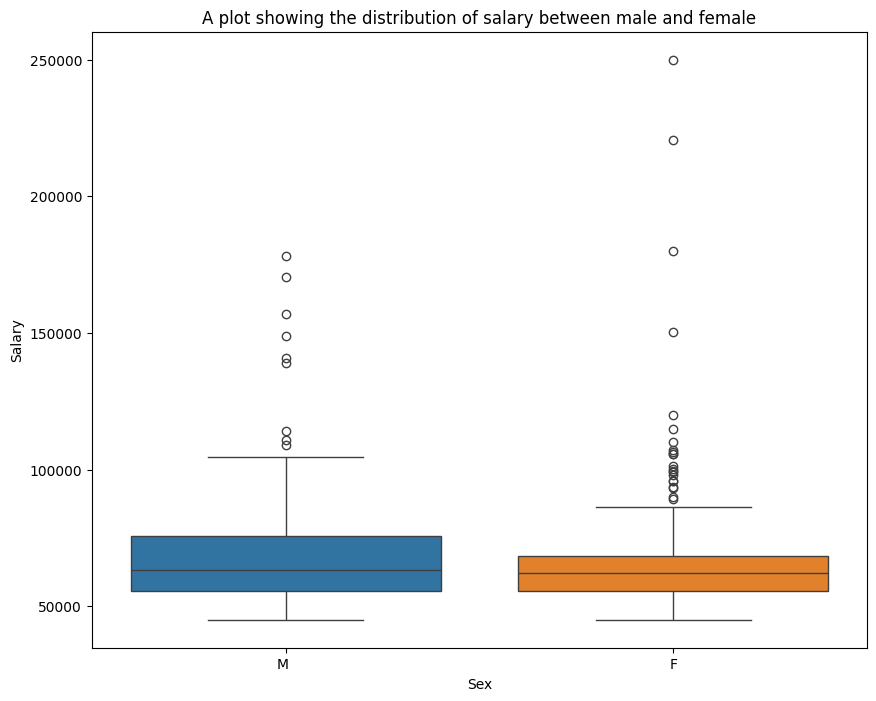

In [441]:
#Plot average salary by gender using a boxplot.
plt.figure(figsize=(10,8))
sns.boxplot(data=hr, x="Sex",y="Salary", hue="Sex")
plt.title(f"A plot showing the distribution of salary between male and female")
plt.xlabel("Sex")
plt.ylabel("Salary")
plt.show()

In [442]:
#Visualize performance scores vs salary.
print(hr['EmpSatisfaction'].unique())

[5 3 4 2 1]


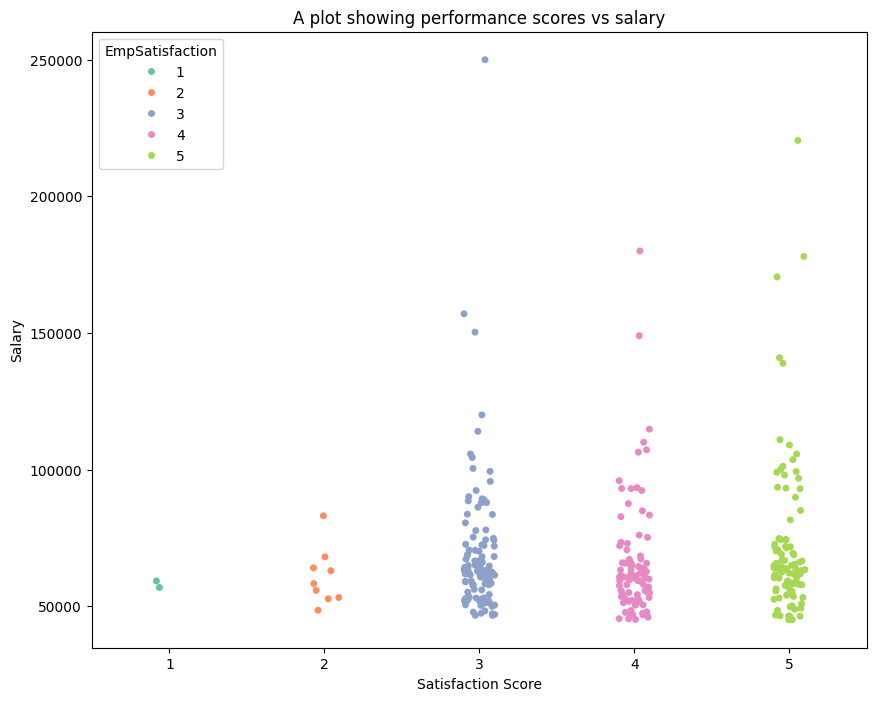

In [443]:
plt.figure(figsize=(10,8))
sns.stripplot(data=hr, x="EmpSatisfaction",y="Salary", hue="EmpSatisfaction",palette="Set2")
plt.title(f"A plot showing performance scores vs salary")
plt.xlabel("Satisfaction Score")
plt.ylabel("Salary")
plt.show()

In [444]:
#Create a heatmap of correlations between numeric variables.

In [445]:
hr.corr(method='pearson', numeric_only=True)

,EmpID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,PositionID,Zip,ManagerID,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences,Age
EmpID,1.000000,-0.043851,0.035914,0.073750,0.107406,-0.691348,0.046805,-0.115319,-0.036488,0.026858,0.090236,-0.589664,-0.146967,-0.043730,0.495513,-0.025278,0.037669
MaritalStatusID,-0.043851,1.000000,-0.030236,0.114630,0.012768,0.044693,0.041117,-0.070291,0.021923,0.010620,0.023065,0.033249,0.002068,-0.051093,-0.096500,0.018722,-0.041220
GenderID,0.035914,-0.030236,1.000000,-0.032440,-0.038838,-0.054915,0.031493,0.056097,-0.081612,0.048539,-0.043218,-0.036276,-0.044603,0.087073,0.080329,-0.004577,0.039394
EmpStatusID,0.073750,0.114630,-0.032440,1.000000,0.088711,-0.071208,0.189025,-0.110912,0.221221,-0.150527,0.234222,0.024305,0.010553,-0.166560,0.078318,0.091834,-0.099149
DeptID,0.107406,0.012768,-0.038838,0.088711,1.000000,-0.084811,-0.129998,-0.448132,0.030294,0.290023,0.550240,-0.094940,0.031997,-0.785101,0.124630,0.053308,-0.080527
PerfScoreID,-0.691348,0.044693,-0.054915,-0.071208,-0.084811,1.000000,0.012315,0.130903,0.005227,-0.058350,-0.060552,0.544927,0.303579,0.045677,-0.734728,0.046629,-0.067891
FromDiversityJobFairID,0.046805,0.041117,0.031493,0.189025,-0.129998,0.012315,1.000000,0.041248,0.015085,-0.028314,0.007570,-0.013040,-0.034468,0.031393,0.042532,0.062640,-0.190023
Salary,-0.115319,-0.070291,0.056097,-0.110912,-0.448132,0.130903,0.041248,1.000000,-0.130563,-0.037242,-0.435406,0.064966,0.062718,0.508333,-0.069443,0.082382,-0.052566
PositionID,-0.036488,0.021923,-0.081612,0.221221,0.030294,0.005227,0.015085,-0.130563,1.000000,-0.552665,0.098005,0.074974,-0.010402,-0.154326,-0.004040,-0.071434,0.036242
Zip,0.026858,0.010620,0.048539,-0.150527,0.290023,-0.058350,-0.028314,-0.037242,-0.552665,1.000000,0.119223,-0.132848,-0.064571,-0.097027,0.016150,0.078779,-0.061512


In [446]:
numeric_hr= hr.select_dtypes(include = "number")

In [447]:
corr_matrix = numeric_hr.corr()

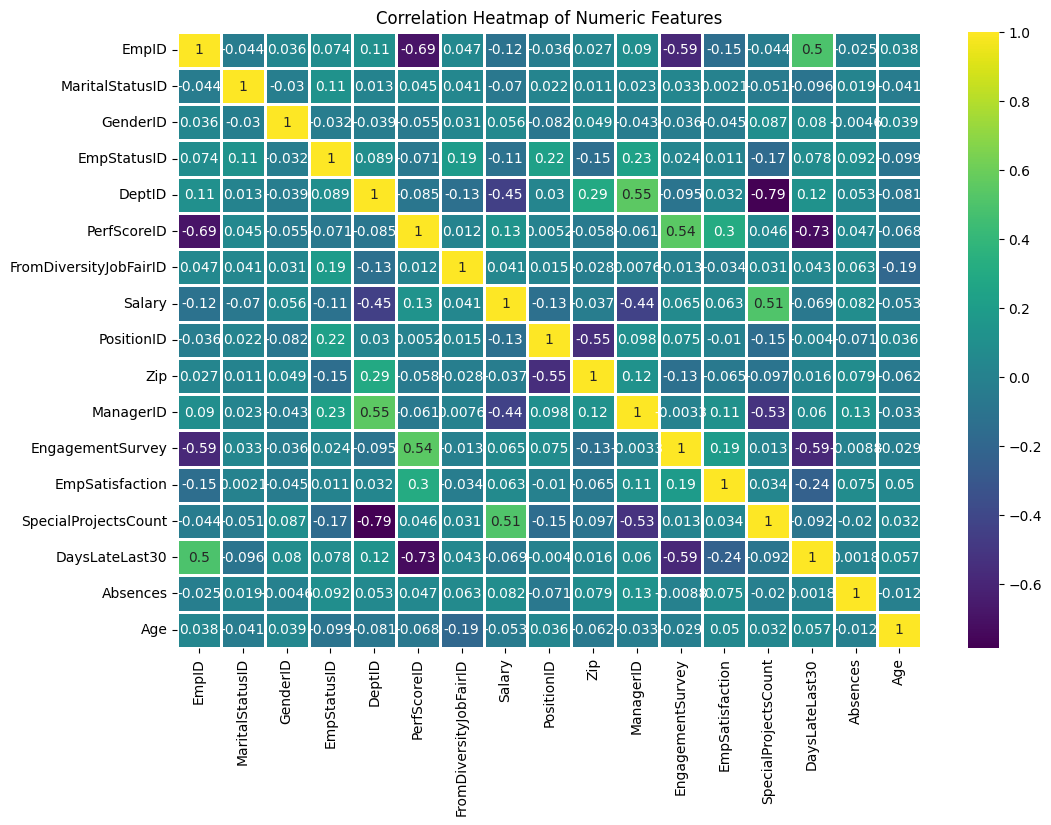

In [448]:
#Create a heatmap of correlations between numeric variables.
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix,annot=True, linewidths=.75,cmap="viridis")
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

In [449]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 1 to 311
Data columns (total 37 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Employee_Name               311 non-null    object        
 1   EmpID                       311 non-null    int64         
 2   MarriedID                   311 non-null    object        
 3   MaritalStatusID             311 non-null    int64         
 4   GenderID                    311 non-null    int64         
 5   EmpStatusID                 311 non-null    int64         
 6   DeptID                      311 non-null    int64         
 7   PerfScoreID                 311 non-null    int64         
 8   FromDiversityJobFairID      311 non-null    int64         
 9   Salary                      311 non-null    int64         
 10  Termd                       311 non-null    datetime64[ns]
 11  PositionID                  311 non-null    int64         

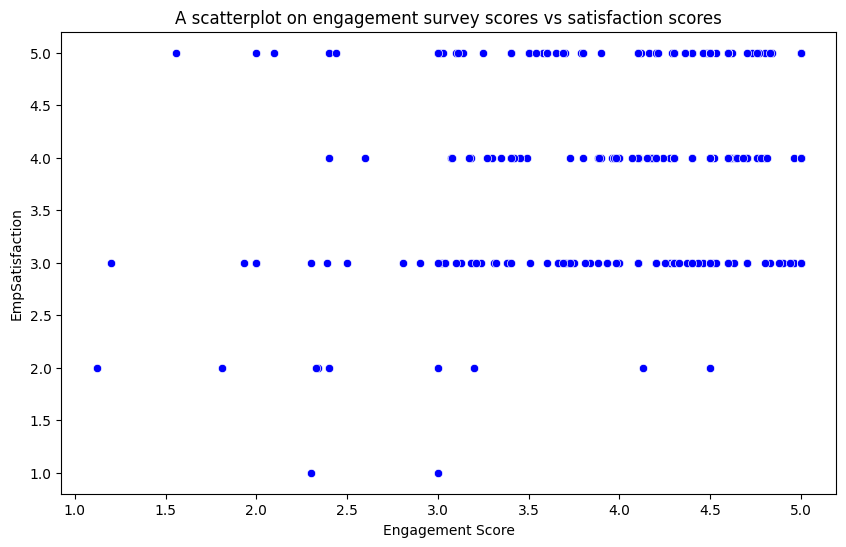

In [450]:
#Plot engagement survey score vs satisfaction score.
plt.figure(figsize=(10,6))
sns.scatterplot(x="EngagementSurvey",y="EmpSatisfaction",data=hr,color="blue")
plt.title("A scatterplot on engagement survey scores vs satisfaction scores")
plt.xlabel("Engagement Score")
plt.ylabel("EmpSatisfaction")
plt.show()

In [451]:
print(hr["EmploymentStatus"].unique())

['Active' 'Voluntarily Terminated' 'Terminated for Cause']


In [452]:
print(hr["Department"].value_counts())

Department
Production              209
IT/IS                    50
Sales                    31
Software Engineering     11
Admin Offices             9
Executive Office          1
Name: count, dtype: int64


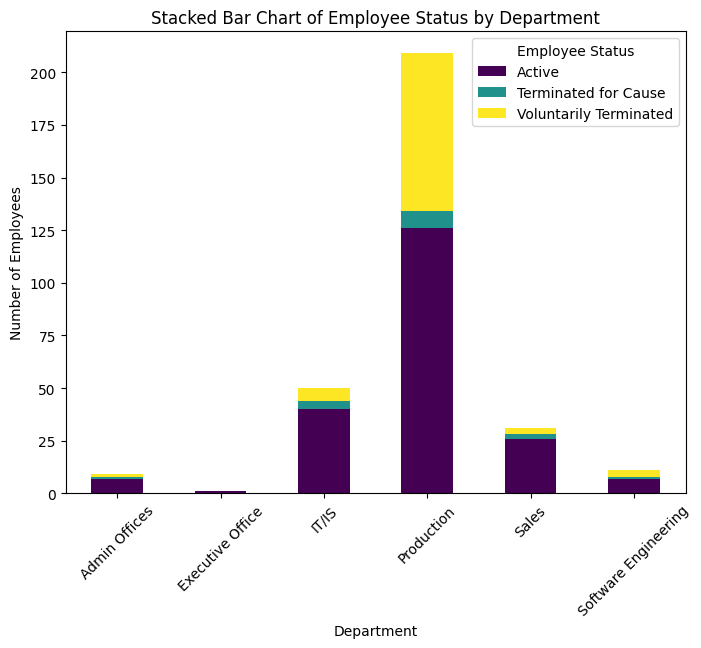

In [453]:
#Show a stacked bar chart of employee status across departments.
#for a stacked barchart create a crosstab connection between the three
status_department = pd.crosstab(hr["Department"], hr["EmploymentStatus"])
#plot
status_department.plot(kind="bar", stacked=True, figsize=(8,6), colormap="viridis")
plt.title("Stacked Bar Chart of Employee Status by Department")
plt.xlabel("Department")
plt.ylabel("Number of Employees")
plt.xticks(rotation=45)
plt.legend(title="Employee Status")
plt.show()


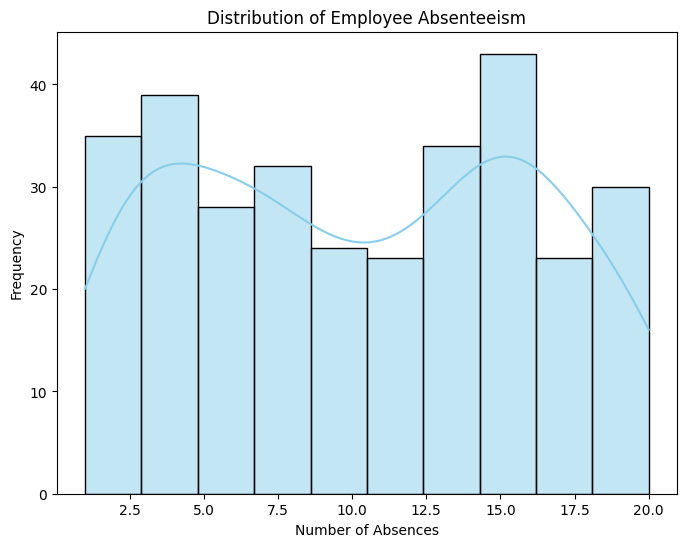

In [454]:
#Plot absenteeism (Absences) distribution among employees.
plt.figure(figsize=(8,6))
sns.histplot(data=hr,x="Absences",bins=10, kde=True, color="skyblue")
plt.title("Distribution of Employee Absenteeism")
plt.xlabel("Number of Absences")
plt.ylabel("Frequency")
plt.show()


#### Part D: PCA (Dimensionality Reduction)

In [455]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 1 to 311
Data columns (total 37 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Employee_Name               311 non-null    object        
 1   EmpID                       311 non-null    int64         
 2   MarriedID                   311 non-null    object        
 3   MaritalStatusID             311 non-null    int64         
 4   GenderID                    311 non-null    int64         
 5   EmpStatusID                 311 non-null    int64         
 6   DeptID                      311 non-null    int64         
 7   PerfScoreID                 311 non-null    int64         
 8   FromDiversityJobFairID      311 non-null    int64         
 9   Salary                      311 non-null    int64         
 10  Termd                       311 non-null    datetime64[ns]
 11  PositionID                  311 non-null    int64         

In [456]:
#Drop id and categorical columns
drop_col=['EmpID','ManagerID','Zip','PositionID',
          'MaritalStatusID','GenderID','EmpStatusID',
          'DeptID','PerfScoreID','FromDiversityJobFairID']

In [457]:
x=hr.drop(columns=drop_col, errors="ignore")

In [458]:
numeric_cols=x.select_dtypes(include="number").columns

In [459]:
#Standardize
scaler=StandardScaler()
x_scaled=pd.DataFrame(scaler.fit_transform(x[numeric_cols]),columns=numeric_cols)
x_scaled.head(2)

,Salary,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences,Age
0,-0.259382,0.621302,1.222022,-0.519538,-0.320937,-1.580979,0.644828
1,1.410101,1.077769,-0.981160,2.038398,-0.320937,1.157257,0.852402


In [460]:
hr.isnull().sum()

Employee_Name                   0
EmpID                           0
MarriedID                       0
MaritalStatusID                 0
GenderID                        0
EmpStatusID                     0
DeptID                          0
PerfScoreID                     0
FromDiversityJobFairID          0
Salary                          0
Termd                           0
PositionID                      0
Position                        0
State                           0
Zip                             0
DOB                             0
Sex                             0
MaritalDesc                     0
CitizenDesc                     0
HispanicLatino                  0
RaceDesc                        0
DateofHire                      0
DateofTermination             207
TermReason                      0
EmploymentStatus                0
Department                      0
ManagerName                     0
ManagerID                       8
RecruitmentSource               0
PerformanceSco

In [461]:
x_scaled_drop=x_scaled.dropna()

In [462]:
#Perform PCA on the dataset and explain the first 2 components
pca=PCA(n_components=2)
x_pca=pca.fit(x_scaled_drop)
print(pca.explained_variance_ratio_)

[0.25505835 0.20611375]


###### The 2components explain 45% of our dataset variance. It's decent but more components would explain more about the dataset.

In [463]:
# Explained variance
explained_var = pca.explained_variance_ratio_
print("Explained variance ratio:", explained_var)
print("Cumulative variance:", explained_var.cumsum())

Explained variance ratio: [0.25505835 0.20611375]
Cumulative variance: [0.25505835 0.4611721 ]


In [464]:
#Plot the explained variance ratio for the PCA components.
pca=PCA()
x_pca=pca.fit(x_scaled_drop)
print(pca.explained_variance_ratio_)

[0.25505835 0.20611375 0.14926211 0.14622916 0.11690439 0.0705592
 0.05587304]


Text(0.5, 1.0, 'A graph showing explained variance vs number of components')

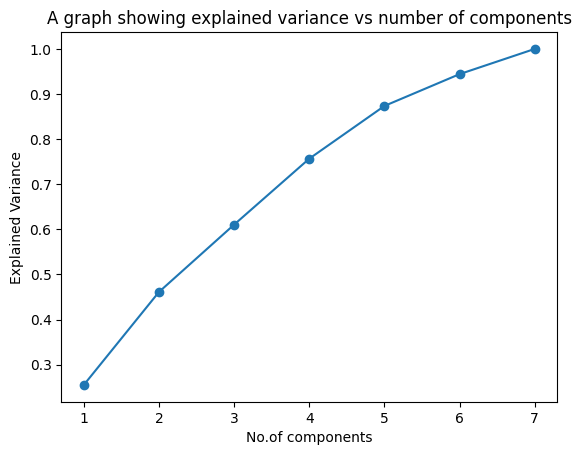

In [465]:
#Plot the explained variance ratio for the PCA components.
plt.plot(range(1,len(x_pca.explained_variance_ratio_)+1),x_pca.explained_variance_ratio_.cumsum(),marker="o")
plt.xlabel("No.of components")
plt.ylabel("Explained Variance")
plt.title("A graph showing explained variance vs number of components")

In [466]:
#Reduce the dataset to 2 dimensions with PCA and plot employees colored by department.
X = hr.select_dtypes(include="number")   # numeric features for pca
y = hr['DeptID'].values 

In [467]:
#Standardizing
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [468]:
#PCA to reduce it to fewer components
pca=PCA(n_components=2)
x_pca=pca.fit_transform(x_scaled) #an array

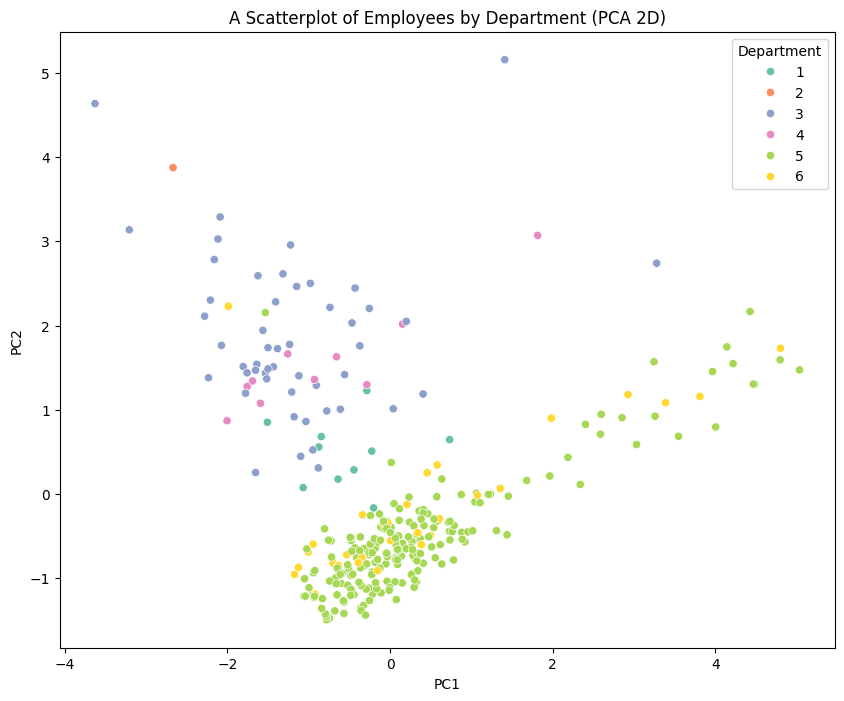

In [469]:
# Use seaborn scatterplot
plt.figure(figsize=(10,8))
sns.scatterplot(x=x_pca[:,0], y=x_pca[:,1], hue=y,palette="Set2")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("A Scatterplot of Employees by Department (PCA 2D)")
plt.legend(title="Department")
plt.show()

In [470]:
#Which variables contribute most to the first principal component?
#Get loadings for PC1
pc1_loadings = pd.Series(pca.components_[0], index=x_scaled.columns)

In [471]:
# Sort by absolute contribution
pc1_loadings.sort_values(ascending=False).head(5)

DaysLateLast30          0.591936
Age                     0.052225
Absences               -0.054094
SpecialProjectsCount   -0.307609
Salary                 -0.335012
dtype: float64

In [472]:
#Apply PCA to engagement + satisfaction + absences. Do these condense into 1 dimension?

In [473]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 1 to 311
Data columns (total 37 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Employee_Name               311 non-null    object        
 1   EmpID                       311 non-null    int64         
 2   MarriedID                   311 non-null    object        
 3   MaritalStatusID             311 non-null    int64         
 4   GenderID                    311 non-null    int64         
 5   EmpStatusID                 311 non-null    int64         
 6   DeptID                      311 non-null    int64         
 7   PerfScoreID                 311 non-null    int64         
 8   FromDiversityJobFairID      311 non-null    int64         
 9   Salary                      311 non-null    int64         
 10  Termd                       311 non-null    datetime64[ns]
 11  PositionID                  311 non-null    int64         

In [474]:
print(hr["Absences"].unique())

[ 1 17  3 15  2 19  4 16 12  9  7 20  8 13  5 14  6 11 10 18]


In [475]:
print(hr["EmpSatisfaction"].unique())

[5 3 4 2 1]


In [476]:
print(hr["EngagementSurvey"].unique())

[4.6  4.96 3.02 4.84 5.   3.04 4.46 4.2  4.28 4.4  4.5  2.   4.8  3.5
 3.39 3.35 3.19 3.14 4.51 3.25 3.84 4.43 3.3  3.8  3.   4.3  3.58 4.7
 4.1  4.13 3.7  4.73 4.12 4.62 3.1  3.96 3.79 1.93 1.12 3.01 2.3  3.88
 3.4  4.11 4.77 4.52 2.9  2.1  4.   3.13 1.56 1.2  4.76 3.66 3.73 4.24
 3.97 3.9  4.61 4.63 4.64 4.17 3.6  3.03 4.48 3.24 3.72 2.34 3.99 3.75
 3.07 4.83 3.49 3.38 3.65 4.78 4.9  4.88 4.53 3.18 4.65 3.08 3.93 4.18
 4.37 2.39 3.81 4.29 2.33 4.25 3.89 3.54 2.4  3.45 4.16 3.17 4.15 3.98
 4.36 3.69 4.94 2.6  3.51 3.31 4.81 3.32 4.68 3.27 1.81 4.21 2.44 2.81
 4.33 3.21 3.11 2.5  3.42 4.07 3.2 ]


In [477]:
three=hr[["Absences","EngagementSurvey","EmpSatisfaction"]]

In [478]:
#Standardizing and scaling
scaler = StandardScaler()
three_scaled=scaler.fit_transform(three)

In [479]:
#Apply PCA
pca=PCA()
three_pca=pca.fit(three_scaled)
print()

In [480]:
# Explained variance
explained_variance = pca.explained_variance_ratio_
print("Explained variance ratio:", explained_variance)
print("*"*70)
print("Cumulative variance:", explained_variance.cumsum())
print("*"*70)

Explained variance ratio: [0.39958328 0.33535499 0.26506173]
**********************************************************************
Cumulative variance: [0.39958328 0.73493827 1.        ]
**********************************************************************


#####  Do these condense into 1 dimension?
-Not really...PC1 only captured approximately 40% and after second component 73% was captured which is decent but the three are needed for a whole.


In [481]:
#Visualize employees in PCA-reduced 2D space grouped by PerformanceScore.
pca=PCA(n_components=2)
x_pca=pca.fit_transform(x_scaled)

In [482]:
#convert to df instead of defining x and y
pca_df = pd.DataFrame(x_pca, columns=["PC1","PC2"])
pca_df["PerformanceScore"] = hr["PerfScoreID"].values

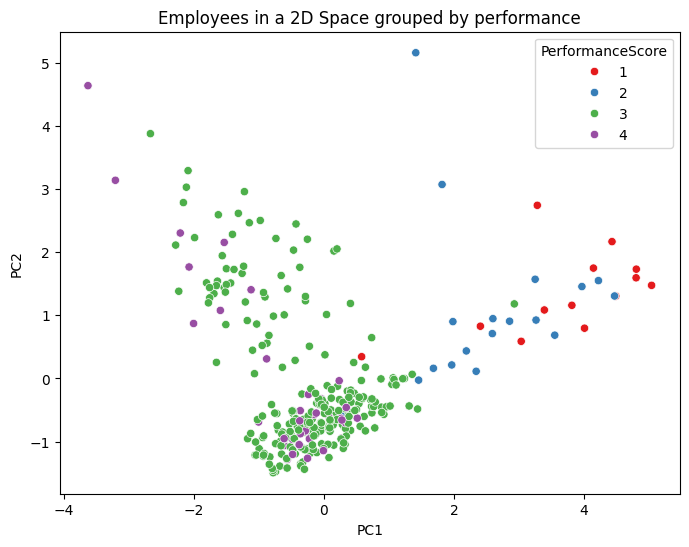

In [483]:
#Plotting
plt.figure(figsize=(8,6))
sns.scatterplot(data=pca_df,x="PC1", y="PC2",hue="PerformanceScore",palette="Set1")
plt.title("Employees in PCA 2D Space Grouped by Performance Score")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Employees in a 2D Space grouped by performance")
plt.show()

In [484]:
#Compare clustering before and after PCA using k-means on numeric data.

In [485]:
#Drop id and categorical columns
drop_col=['EmpID','ManagerID','Zip','PositionID',
          'MaritalStatusID','GenderID','EmpStatusID',
          'DeptID','PerfScoreID','FromDiversityJobFairID']

In [486]:
x=hr.drop(columns=drop_col, errors="ignore")

In [487]:
numeric_cols=x.select_dtypes(include="number").columns

In [488]:
scaler=StandardScaler()
x_scaled=pd.DataFrame(scaler.fit_transform(x[numeric_cols]),columns=numeric_cols)
x_scaled.head(2)

,Salary,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences,Age
0,-0.259382,0.621302,1.222022,-0.519538,-0.320937,-1.580979,0.644828
1,1.410101,1.077769,-0.981160,2.038398,-0.320937,1.157257,0.852402


In [489]:
#Apply kmeans
kmeans_before = KMeans(n_clusters=3, random_state=42, init='k-means++',n_init=10)
before_pca = kmeans_before.fit_predict(x_scaled)
print(before_pca)

[2 1 2 2 2 2 1 2 2 1 2 2 1 2 2 2 2 2 1 2 2 2 2 0 2 1 1 2 2 1 2 2 2 2 2 1 2
 1 2 1 2 2 1 2 2 2 2 2 1 2 2 2 2 0 0 1 2 1 2 1 2 1 2 2 2 2 1 0 2 0 1 2 0 2
 2 1 1 2 2 2 2 2 2 0 0 0 0 2 2 2 0 0 2 2 2 0 1 1 2 1 2 2 2 2 2 2 2 2 1 1 2
 2 0 1 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 1 1 2 2 2 2 2 0 2 2 2 2 2 2 1 2 2 2
 2 2 1 2 2 2 2 2 1 2 2 2 1 2 1 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 1 2 2 2 2
 2 2 2 0 2 0 2 2 1 2 2 2 1 2 2 2 2 2 2 2 0 2 2 2 0 2 2 1 1 0 0 2 2 2 2 1 2
 2 2 2 2 2 2 1 2 2 2 2 2 2 2 0 2 1 1 1 2 2 1 1 1 0 2 2 1 2 2 1 2 1 1 2 2 0
 2 2 1 1 0 2 2 2 0 1 2 2 2 2 2 1 1 2 2 2 2 2 2 2 0 1 1 2 1 2 2 2 2 1 2 2 2
 2 0 1 1 2 2 2 2 2 2 2 0 1 1 2]


In [490]:
#Apply PCA
pca=PCA(n_components=2)
x_pca=pca.fit_transform(x_scaled)


In [491]:
#Kmeans and pca
kmeans_after = KMeans(n_clusters=3, random_state=42, init='k-means++',n_init=10)
after_pca = kmeans_before.fit_predict(x_pca)
print(after_pca)

[0 1 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 2 0 1 1 0 0 1 0 0 0 0 0 1 0
 1 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 2 2 1 0 1 0 1 0 1 0 0 0 0 1 2 0 2 1 0 2 0
 0 1 1 0 0 0 0 0 0 2 0 2 2 0 0 0 2 2 0 0 0 2 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0
 0 2 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 2 0 0 0 0 0 0 1 0 0 0
 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 2 0 2 0 0 1 0 0 0 1 0 0 0 0 0 0 0 2 0 0 0 2 0 0 1 1 2 2 0 0 0 0 1 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 2 0 1 1 1 0 0 1 1 1 2 0 0 1 0 0 1 0 1 0 0 0 2
 0 0 1 1 2 0 0 0 2 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 2 1 1 0 1 0 0 0 0 1 0 0 0
 0 2 1 1 0 0 0 0 0 0 0 2 1 1 0]


In [492]:
#Plot loadings of salary, absences, and engagement on the first 2 PCs.
x=hr[["Salary","Absences","EngagementSurvey"]]

In [493]:
#Scaling
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

In [494]:
#Apply PCA on first 2 pc's
pca=PCA(n_components=2)
x_pca=pca.fit_transform(x_scaled)

In [495]:
#loadings-matrix of arrows
loadings=pca.components_.T*pca.explained_variance_ratio_**0.5
features=["Salary","Absences","EngagementSurvey"]

###### Will check on this later again...

In [496]:
#Discuss when PCA is appropriate in HR analytics (e.g., reducing survey dimensions)

#### Reducing Survey Dimensions
A data with high-dimension can somehow be difficult to analyze and also model so by using PCA this reduces the number of features but still making the data more meaningful and managable.

#### Anomality Detection
PCA has an ability to identify signifacnt patterns and makes it useful for detecting outliers while analysing the HR dataset.